
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

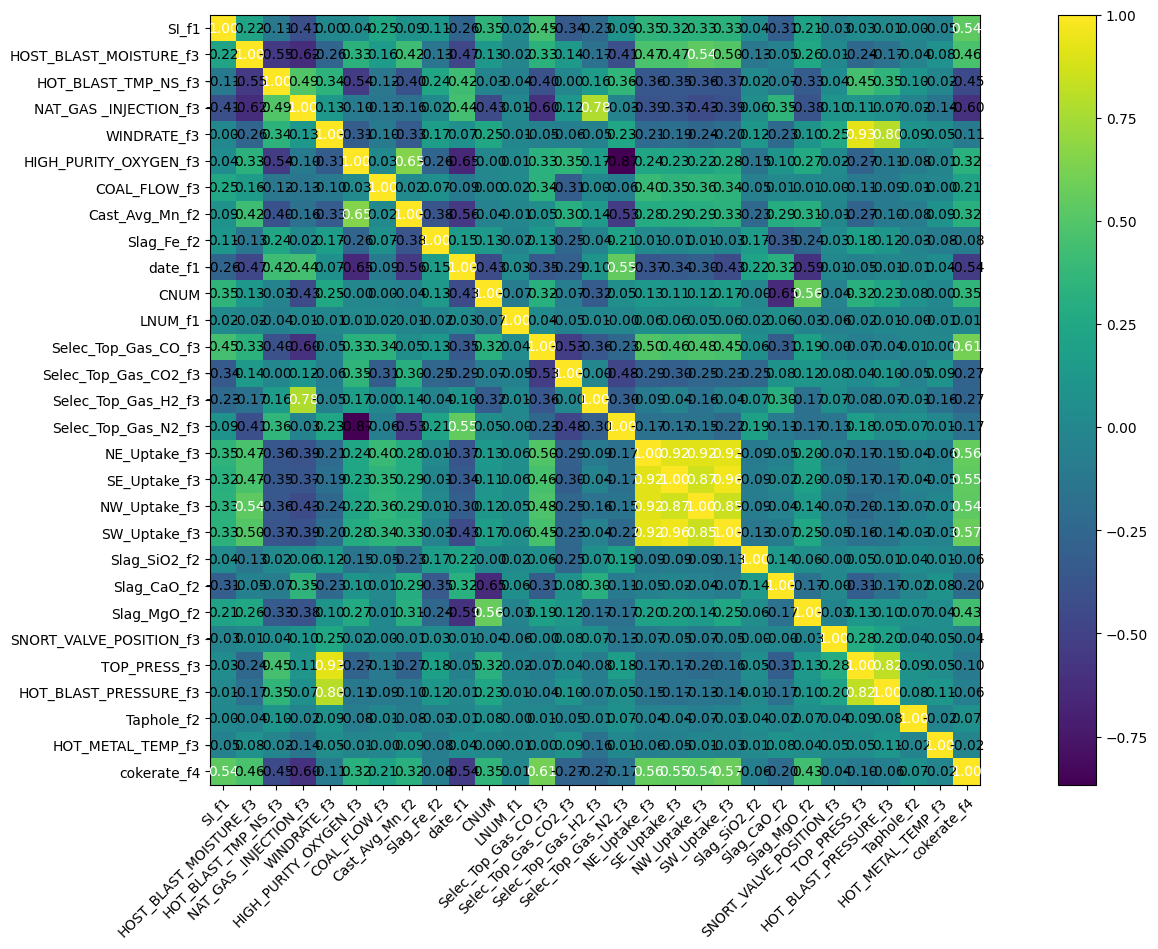

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

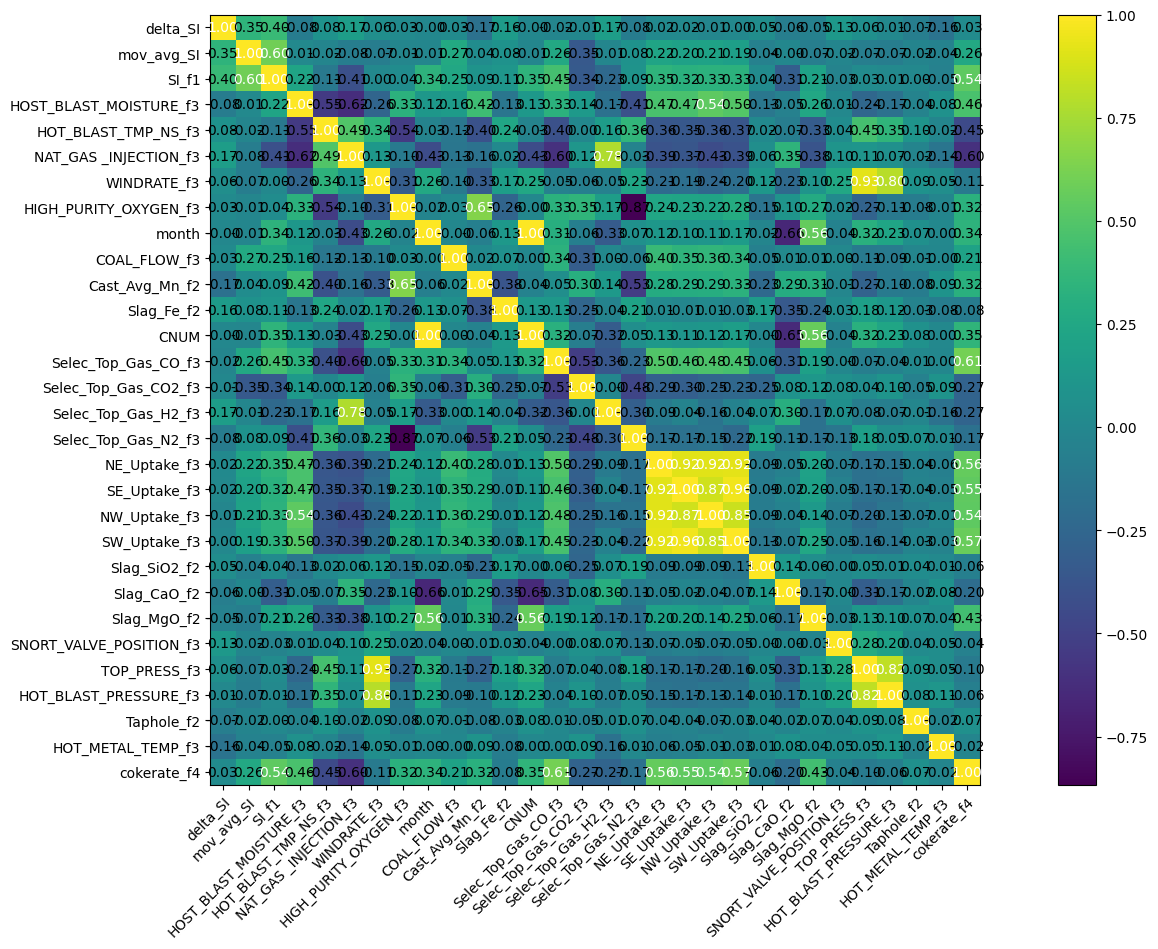

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        # === Forward Pass with Reasoning Mode ===
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        pred = idx_pred[:, -1:, :]
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        
        ###################################################################################
        
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
        ###################################################################################
        
        loss_just_last   = criterion( pred, y_train)   ## just 9th of 9
        
        ## print(idx_pred.shape)
        ## print(yb.shape)
        ## print(xb.shape)
        ## print(idx_pred[:,-10:, :].shape)
        loss_full_seq    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 9 of 9
        
        all_sequence = True
        
        if all_sequence:
            loss_all = loss_full_seq
        else:
            loss_all = loss_just_last
        
        ###################################################################################
        
        
        ## loss_SI  = criterion(pred_si, y_si)    
        loss_mse  = F.mse_loss(    pred_si, y_si)
        loss_cosh = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        
        
        ## loss_SI_main = criterion(pred_si, y_si)
        y_si_early   = yb[:, :1, 2]                  # first 4 steps of SI ground truth
        si_mean_early = y_si_early.mean(dim=1)       # average over early steps
        early_penalty = F.mse_loss(pred_si, si_mean_early)
        beta    = 0  # how much to weigh the early trend alignment (can try 0.2–0.4)
        ## beta       = 0.3 * (1 - batch_i / tsGPT_obj.max_iters)

        loss_SI = (1 - beta) * loss_SI_main + beta * early_penalty
        
        
        ##################################
        
        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        
        
        ####################################################################################
        ## loss_total = loss_SI 
        ## loss_total = custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25)
        ##loss_total = custom_loss_ratio(pred, y_train, mse_weight=0.5, clip_eps=0.2)
        ### ratio 
        ## loss_vector = custom_loss_ratio(pred, y_train, mse_weight=0.5, log_ratio_weight=0.5)
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_vector
        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.893635
Loss_SI: 0.8703143000602722 Loss_all: 1.103516936302185
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.128975
Loss_SI: 0.06921040266752243 Loss_all: 0.6668567657470703
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.071318
Loss_SI: 0.023880384862422943 Loss_all: 0.49825969338417053
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.050259
Loss_SI: 0.012025793083012104 Loss_all: 0.39436084032058716
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.050810
Loss_SI: 0.012463602237403393 Loss_all: 0.39592379331588745
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.039979
Loss_SI: 0.008238506503403187 Loss_all: 0.3256421685218811
Prediction shape: torch.Size([32, 35])
===


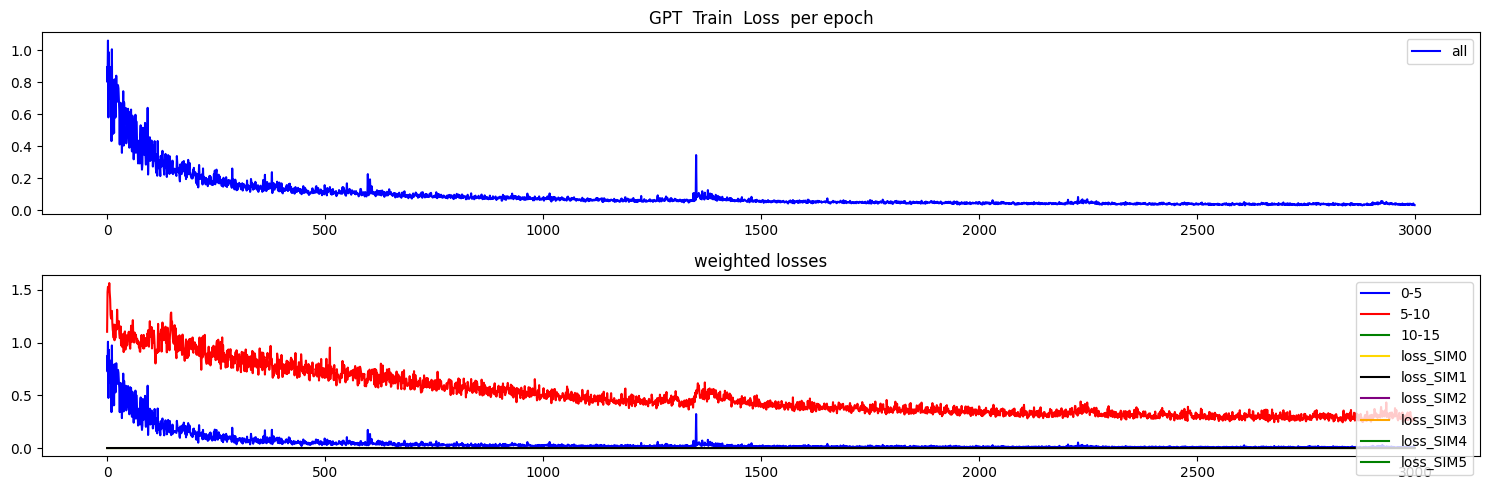

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


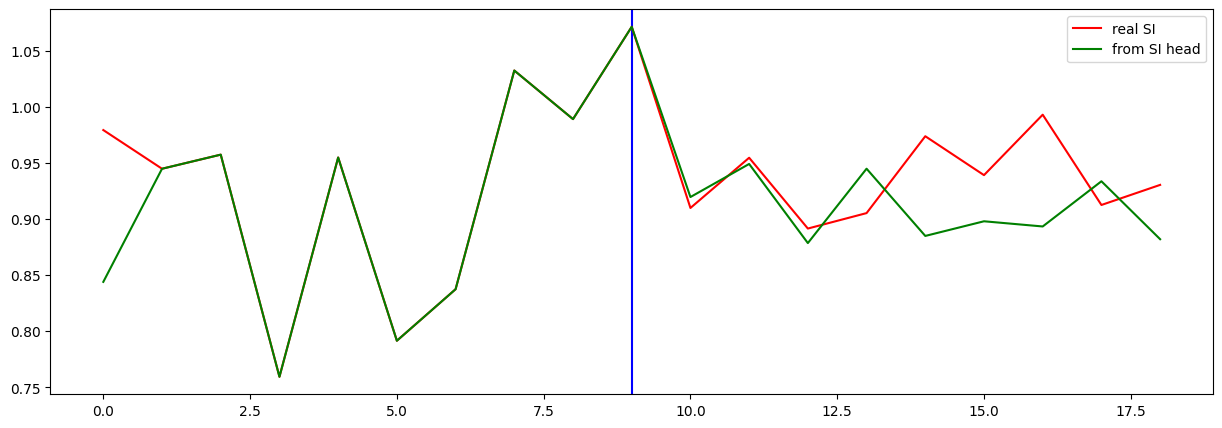

Testing R**2 - (all) - (no inputs):  0.992138524750226
Testing R**2 - (f2) - SI full (no inputs):  -3.176951526701159
Testing R**2 - SI head only (no inputs):  -1.7700436342261008
0 ...index R**2 (no inputs):  -7.7507270104868145
1 ...index R**2 (no inputs):  -0.9442999606127145
2 ...index R**2 (no inputs):  -3.176951526701159
3 ...index R**2 (no inputs):  -59.35391229406558
4 ...index R**2 (no inputs):  -3.4623982267662514
5 ...index R**2 (no inputs):  -5.303205825803177
6 ...index R**2 (no inputs):  -1697.9430151082292
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5323452306146816
10 ...index R**2 (no inputs):  -0.17198001888075387
11 ...index R**2 (no inputs):  -60.30196225248131
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.008108920011810739
16 ...index R**2 (no inputs):  -1.340278542754476
17 ...index R**2 (no inputs):  -157.4801018123

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.644200
Loss_SI: 0.6055751442909241 Loss_all: 0.9918209910392761
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.138582
Loss_SI: 0.07087719440460205 Loss_all: 0.7479256391525269
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.074300
Loss_SI: 0.031993117183446884 Loss_all: 0.45506080985069275
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.067086
Loss_SI: 0.020872989669442177 Loss_all: 0.4830019772052765
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.063877
Loss_SI: 0.02502499148249626 Loss_all: 0.41354918479919434
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.062112
Loss_SI: 0.014400527812540531 Loss_all: 0.4915170669555664
Prediction shape: torch.Size([32, 35])
===


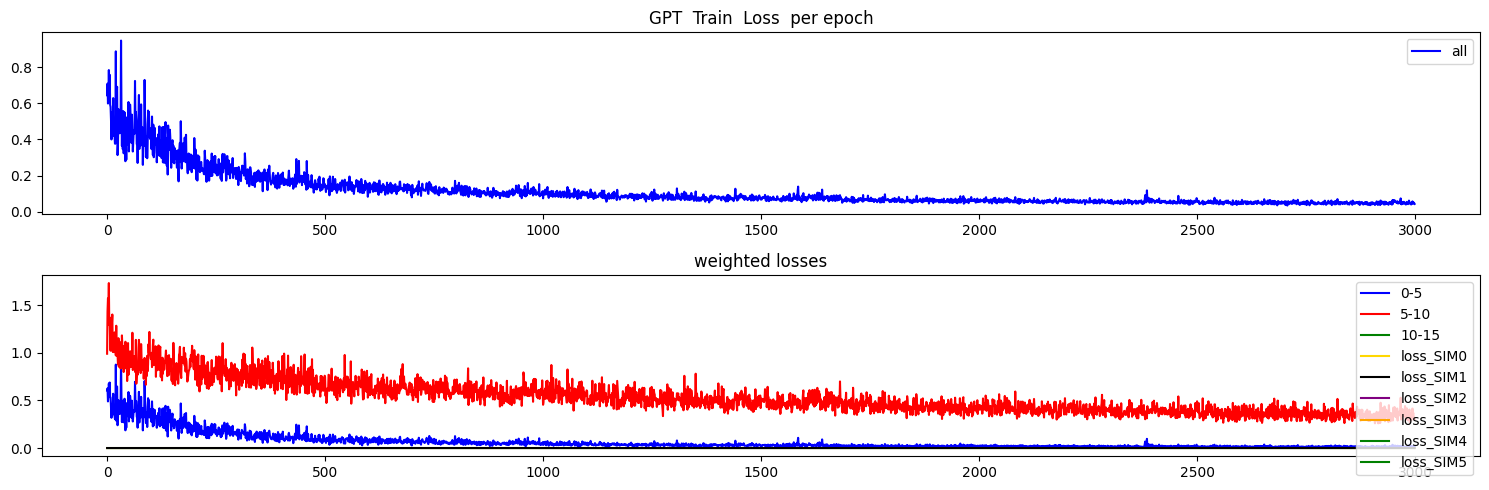

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


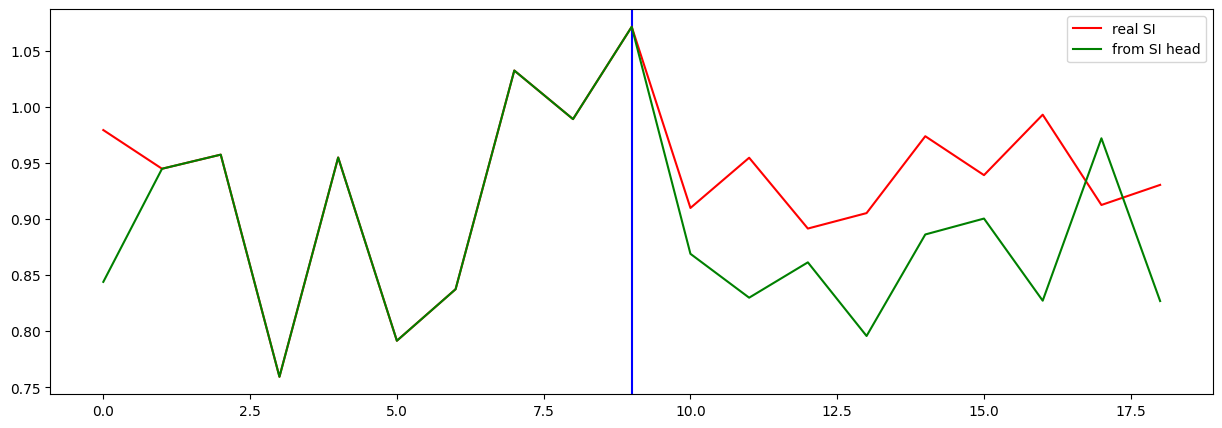

Testing R**2 - (all) - (no inputs):  0.9977597572955591
Testing R**2 - (f2) - SI full (no inputs):  -8.933860292862908
Testing R**2 - SI head only (no inputs):  -7.774010975290629
0 ...index R**2 (no inputs):  -10.243294950108952
1 ...index R**2 (no inputs):  -1.3325307017924417
2 ...index R**2 (no inputs):  -8.933860292862908
3 ...index R**2 (no inputs):  -48.254636131411125
4 ...index R**2 (no inputs):  -11.464798915572825
5 ...index R**2 (no inputs):  -0.7812204410084675
6 ...index R**2 (no inputs):  -2317.0576651627375
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3179596877539679
10 ...index R**2 (no inputs):  0.16072723866088756
11 ...index R**2 (no inputs):  -388.8256762860311
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.982258753534152
16 ...index R**2 (no inputs):  -0.1598025030238579
17 ...index R**2 (no inputs):  -15.35797381310

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.679793
Loss_SI: 0.6221529245376587 Loss_all: 1.1985588073730469
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.285248
Loss_SI: 0.22226107120513916 Loss_all: 0.852134108543396
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.171264
Loss_SI: 0.1042090356349945 Loss_all: 0.7747631072998047
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.121040
Loss_SI: 0.05214838683605194 Loss_all: 0.7410611510276794
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.086778
Loss_SI: 0.026580937206745148 Loss_all: 0.6285552978515625
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.079121
Loss_SI: 0.033399101346731186 Loss_all: 0.4906140863895416
Prediction shape: torch.Size([32, 35])
===


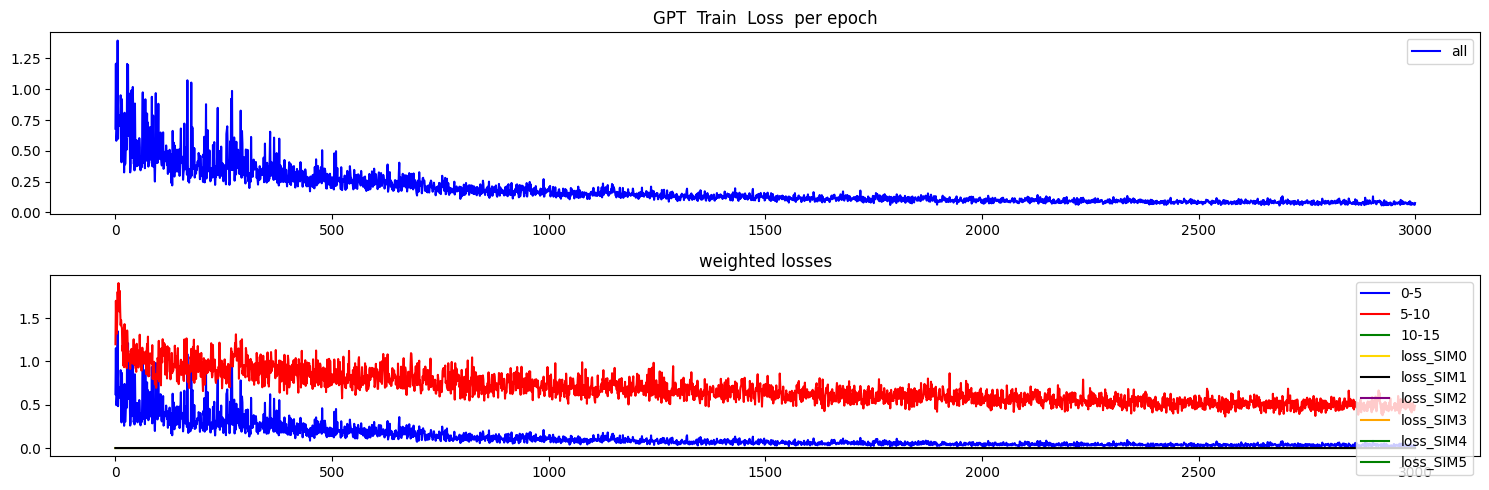

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


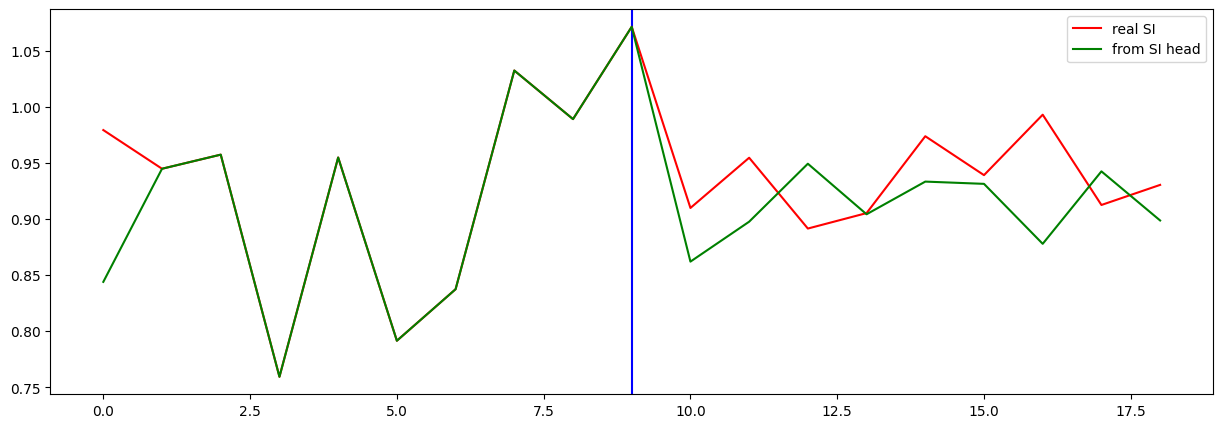

Testing R**2 - (all) - (no inputs):  0.9919866707420083
Testing R**2 - (f2) - SI full (no inputs):  -26.543864692103277
Testing R**2 - SI head only (no inputs):  -1.6867377555116336
0 ...index R**2 (no inputs):  -1.540316071397649
1 ...index R**2 (no inputs):  -1.4965473798187903
2 ...index R**2 (no inputs):  -26.543864692103277
3 ...index R**2 (no inputs):  -208.49455203252944
4 ...index R**2 (no inputs):  -26.719243463071177
5 ...index R**2 (no inputs):  -5.420830943658065
6 ...index R**2 (no inputs):  -152.05769729938015
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.27942488340199323
10 ...index R**2 (no inputs):  0.36703784470227563
11 ...index R**2 (no inputs):  -180.33622740390936
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.8697411507937152
16 ...index R**2 (no inputs):  -0.7148798549787818
17 ...index R**2 (no inputs):  -81.5979859

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.534383
Loss_SI: 0.4764346778392792 Loss_all: 1.0559216737747192
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.316452
Loss_SI: 0.2753152847290039 Loss_all: 0.6866811513900757
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.148644
Loss_SI: 0.10202842950820923 Loss_all: 0.5681812167167664
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.123115
Loss_SI: 0.06319280713796616 Loss_all: 0.6624098420143127
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.092550
Loss_SI: 0.04375645890831947 Loss_all: 0.5316874980926514
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.085888
Loss_SI: 0.03809962421655655 Loss_all: 0.5159854292869568
Prediction shape: torch.Size([32, 35])
===


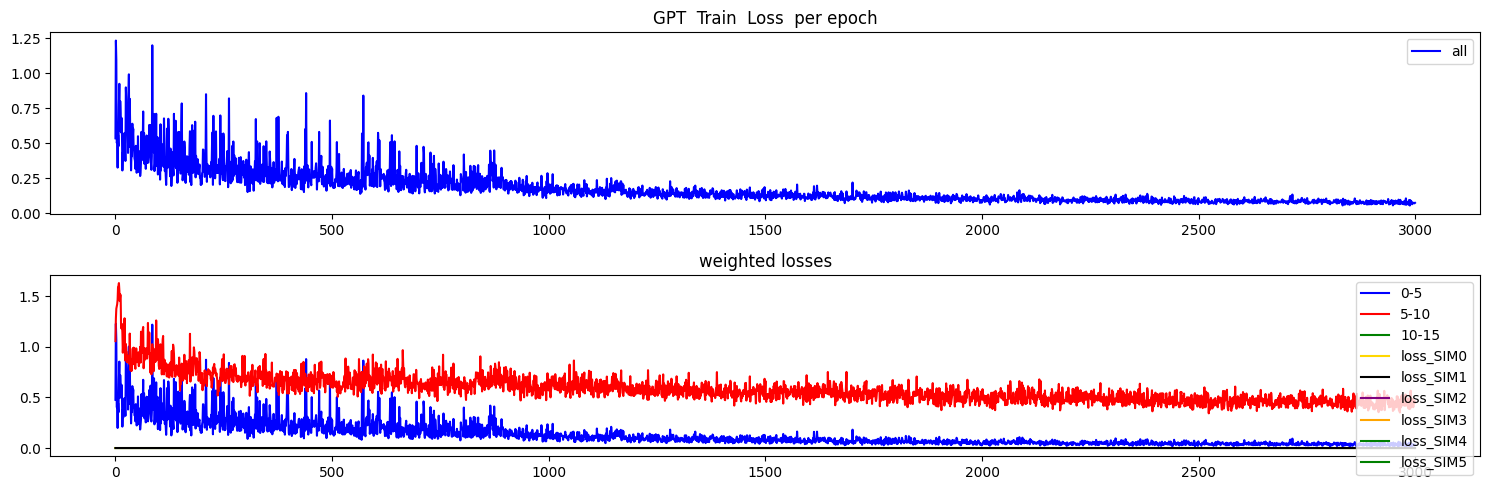

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


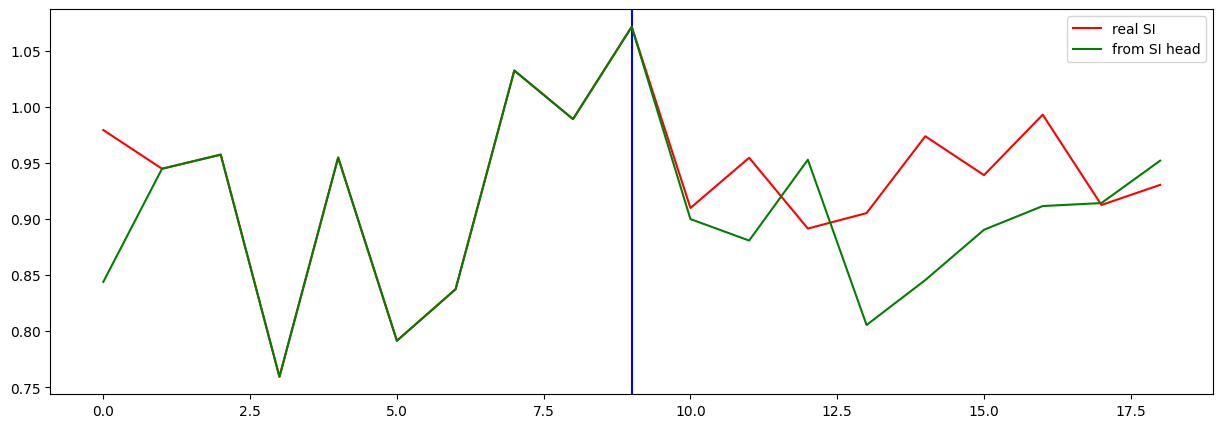

Testing R**2 - (all) - (no inputs):  0.9972250156073119
Testing R**2 - (f2) - SI full (no inputs):  -0.3271916150454848
Testing R**2 - SI head only (no inputs):  -4.357706002300216
0 ...index R**2 (no inputs):  -1.0516762970700366
1 ...index R**2 (no inputs):  -0.7187336337893184
2 ...index R**2 (no inputs):  -0.3271916150454848
3 ...index R**2 (no inputs):  -282.62598451754826
4 ...index R**2 (no inputs):  -27.74519042786222
5 ...index R**2 (no inputs):  -1.1806304488267552
6 ...index R**2 (no inputs):  -257.13505850592014
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.24512204221844147
10 ...index R**2 (no inputs):  -0.006726293376683401
11 ...index R**2 (no inputs):  -40.938839452014236
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.896887701778086
16 ...index R**2 (no inputs):  -0.12164427162330815
17 ...index R**2 (no inputs):  -298.9011

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.501634
Loss_SI: 0.43822574615478516 Loss_all: 1.0723071098327637
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.058651
Loss_SI: 0.02103259041905403 Loss_all: 0.3972204625606537
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.049617
Loss_SI: 0.012577451765537262 Loss_all: 0.3829697072505951
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.035540
Loss_SI: 0.00821048952639103 Loss_all: 0.28150421380996704
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.038430
Loss_SI: 0.011912984773516655 Loss_all: 0.27708321809768677
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.038276
Loss_SI: 0.01132084708660841 Loss_all: 0.28087538480758667
Prediction shape: torch.Size([32, 35])
===


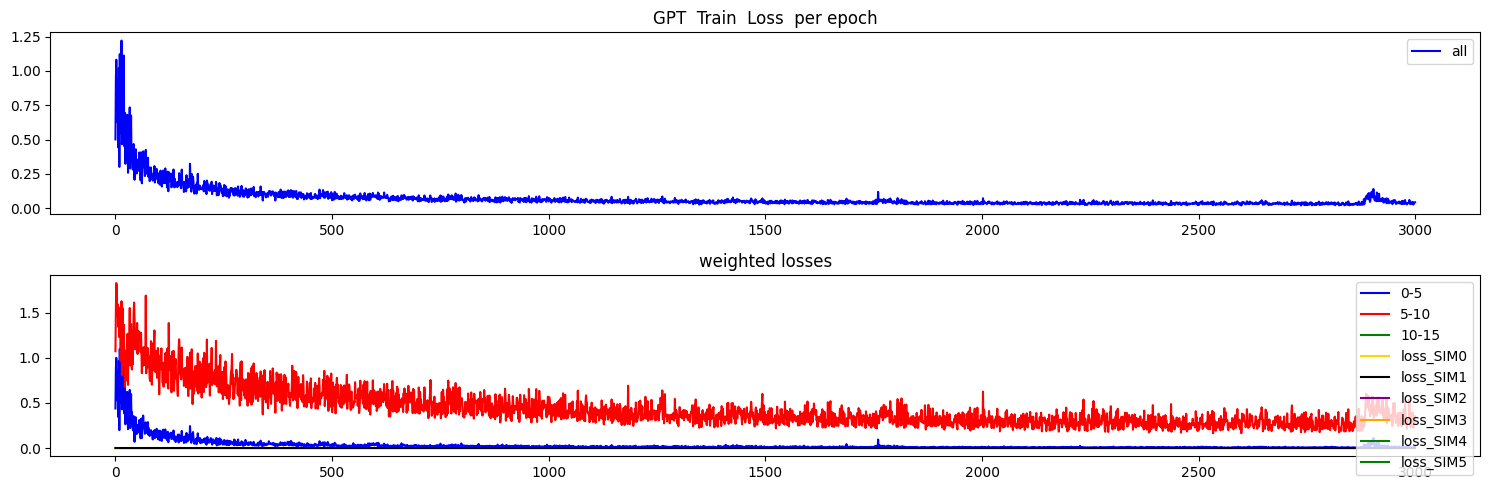

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


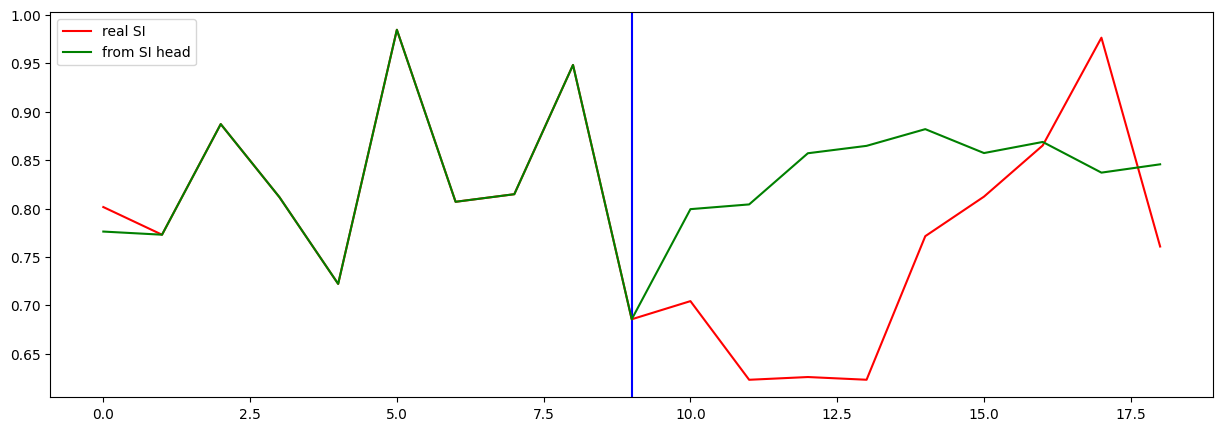

Testing R**2 - (all) - (no inputs):  0.9965678582997122
Testing R**2 - (f2) - SI full (no inputs):  -0.12924846428564218
Testing R**2 - SI head only (no inputs):  -0.2772517737796347
0 ...index R**2 (no inputs):  -0.5670298442595807
1 ...index R**2 (no inputs):  -5.761845478896699
2 ...index R**2 (no inputs):  -0.12924846428564218
3 ...index R**2 (no inputs):  -19.20104526750765
4 ...index R**2 (no inputs):  0.08596904251557635
5 ...index R**2 (no inputs):  -284.9814771065308
6 ...index R**2 (no inputs):  -0.15180085580565272
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.568670056307453
10 ...index R**2 (no inputs):  -1.493904643058777
11 ...index R**2 (no inputs):  -114.78535358189849
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1640479715758767
16 ...index R**2 (no inputs):  -2.475409056014908
17 ...index R**2 (no inputs):  -19.966966550

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.355456
Loss_SI: 0.2836564779281616 Loss_all: 1.0016529560089111
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.144509
Loss_SI: 0.0735587328672409 Loss_all: 0.7830644845962524
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.085671
Loss_SI: 0.041547272354364395 Loss_all: 0.4827840328216553
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.077295
Loss_SI: 0.041714370250701904 Loss_all: 0.39752471446990967
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.067350
Loss_SI: 0.019593235105276108 Loss_all: 0.49715715646743774
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.054991
Loss_SI: 0.020949456840753555 Loss_all: 0.36136090755462646
Prediction shape: torch.Size([32, 35])
===


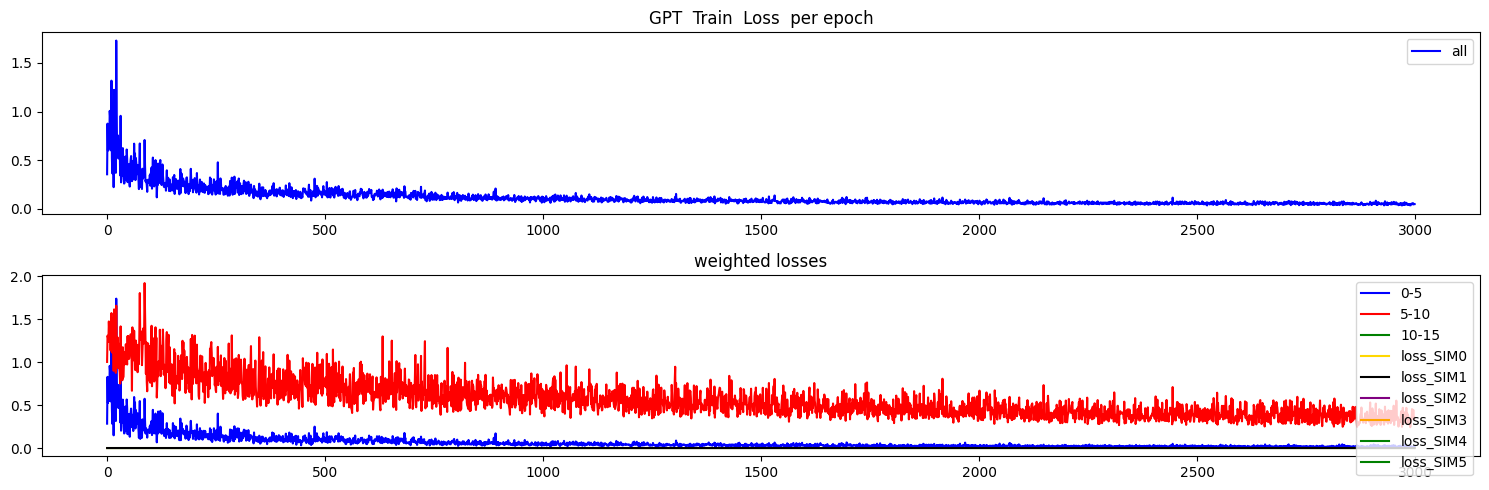

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


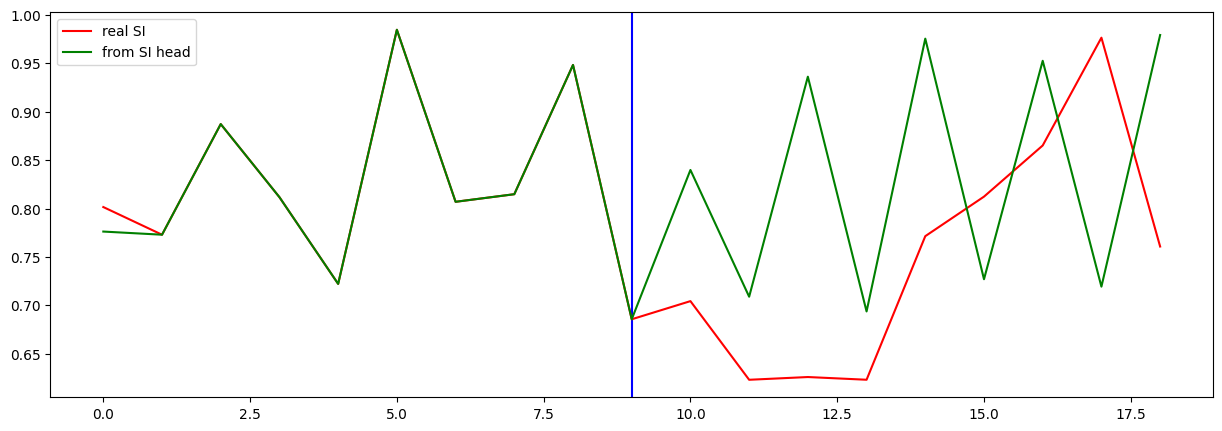

Testing R**2 - (all) - (no inputs):  0.9993155326526756
Testing R**2 - (f2) - SI full (no inputs):  -0.14080895947821315
Testing R**2 - SI head only (no inputs):  -1.0141622751200345
0 ...index R**2 (no inputs):  -2.7292237895875195
1 ...index R**2 (no inputs):  -11.634371868201628
2 ...index R**2 (no inputs):  -0.14080895947821315
3 ...index R**2 (no inputs):  -0.6176248177122787
4 ...index R**2 (no inputs):  -4.382168797516764
5 ...index R**2 (no inputs):  -49.87316050651593
6 ...index R**2 (no inputs):  0.23278589235452152
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.902609411750726
10 ...index R**2 (no inputs):  -0.5547515714261682
11 ...index R**2 (no inputs):  -231.26836258043284
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4587857589983413
16 ...index R**2 (no inputs):  -0.7571302765179542
17 ...index R**2 (no inputs):  -179.631759

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.591308
Loss_SI: 0.5164783000946045 Loss_all: 1.2647747993469238
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.221144
Loss_SI: 0.1410076767206192 Loss_all: 0.9423744082450867
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.124690
Loss_SI: 0.07018224895000458 Loss_all: 0.6152605414390564
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.100430
Loss_SI: 0.05369597673416138 Loss_all: 0.5210373997688293
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.082337
Loss_SI: 0.04976154863834381 Loss_all: 0.3755180835723877
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.076021
Loss_SI: 0.04109249264001846 Loss_all: 0.39037737250328064
Prediction shape: torch.Size([32, 35])
===


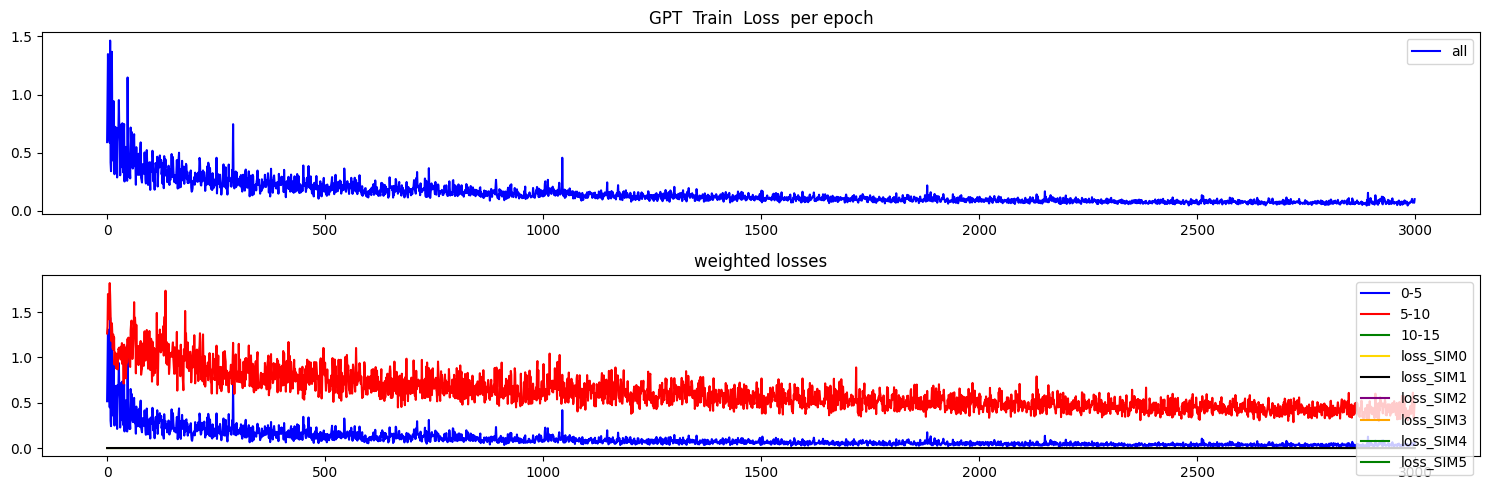

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


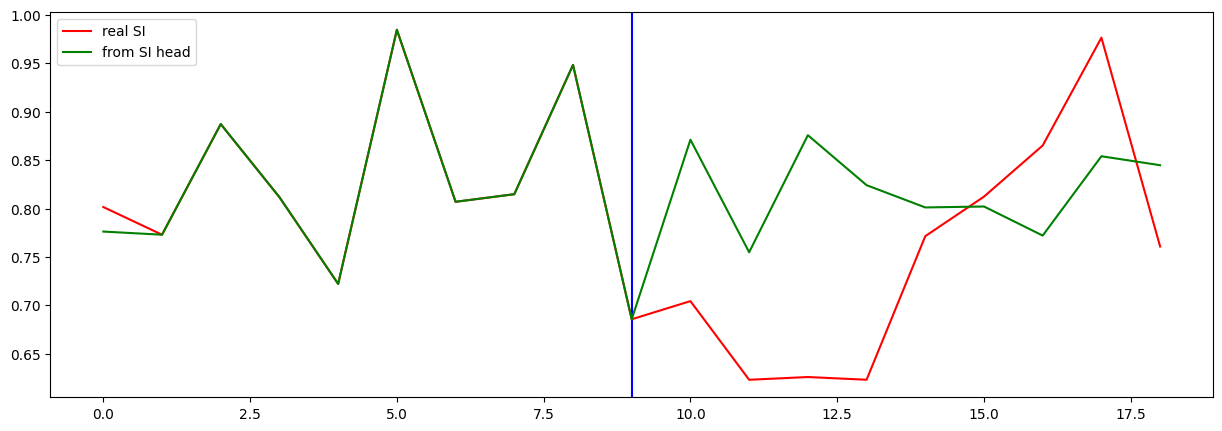

Testing R**2 - (all) - (no inputs):  0.9969148908279973
Testing R**2 - (f2) - SI full (no inputs):  -1.2009778956178825
Testing R**2 - SI head only (no inputs):  -0.7059373435096232
0 ...index R**2 (no inputs):  -0.7179439883556045
1 ...index R**2 (no inputs):  -20.476848917801295
2 ...index R**2 (no inputs):  -1.2009778956178825
3 ...index R**2 (no inputs):  -9.705772658679964
4 ...index R**2 (no inputs):  -18.15716350893873
5 ...index R**2 (no inputs):  -256.5038813010898
6 ...index R**2 (no inputs):  0.013695188596715702
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5765970448766486
10 ...index R**2 (no inputs):  -0.7259047782421113
11 ...index R**2 (no inputs):  -26.704509114757816
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9236135032961732
16 ...index R**2 (no inputs):  -1.3363950327337686
17 ...index R**2 (no inputs):  -142.9710595

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.113850
Loss_SI: 1.0712428092956543 Loss_all: 1.4973158836364746
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.355314
Loss_SI: 0.26842907071113586 Loss_all: 1.1372759342193604
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.167325
Loss_SI: 0.12547022104263306 Loss_all: 0.544015645980835
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.121324
Loss_SI: 0.06664843112230301 Loss_all: 0.6134082674980164
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.124544
Loss_SI: 0.07432181388139725 Loss_all: 0.5765424370765686
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.106326
Loss_SI: 0.0674302950501442 Loss_all: 0.4563831090927124
Prediction shape: torch.Size([32, 35])
===


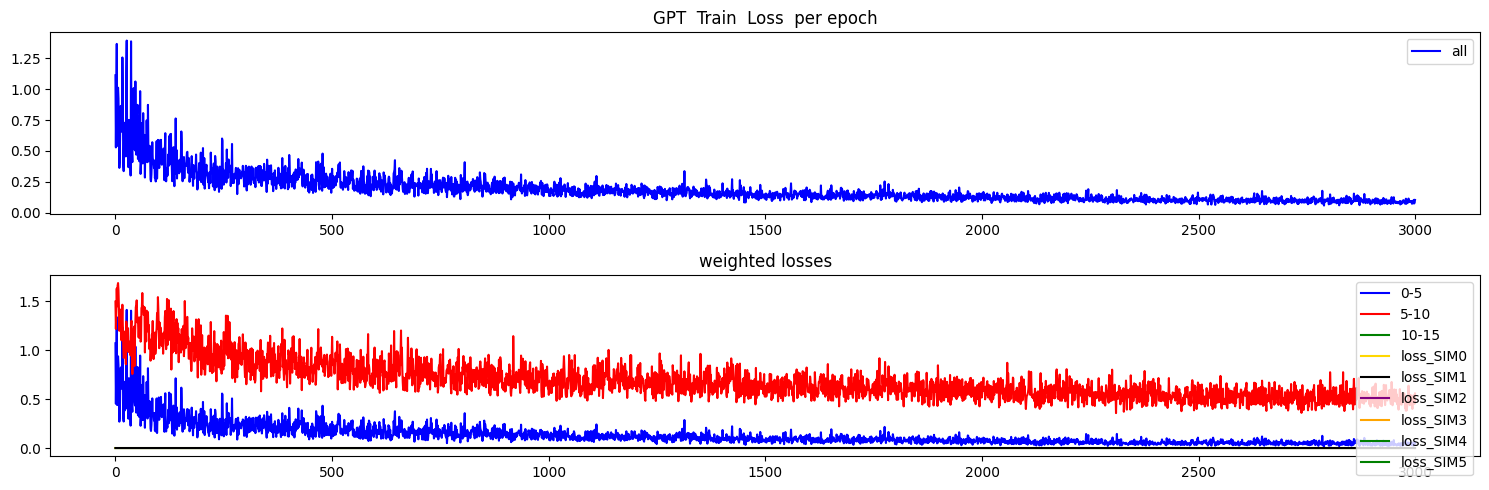

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


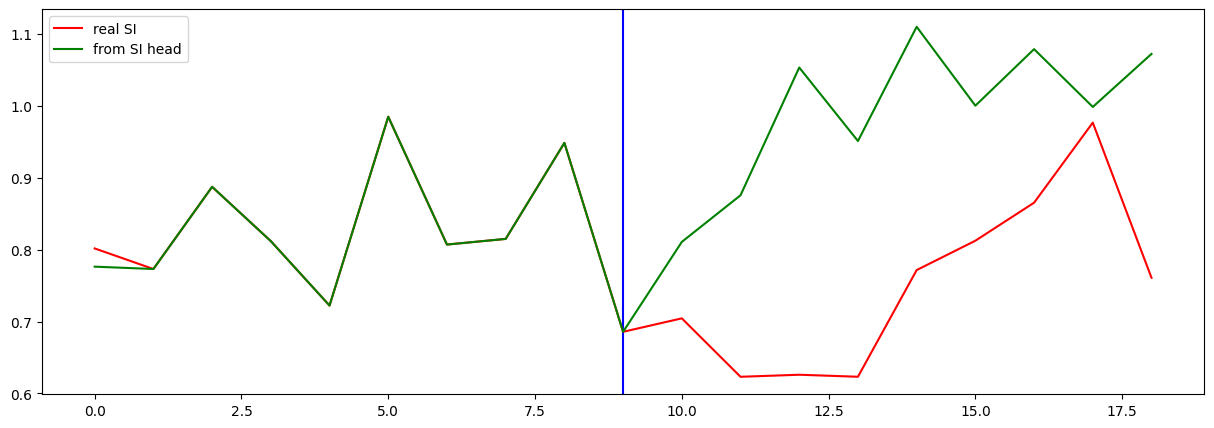

Testing R**2 - (all) - (no inputs):  0.9898861526561927
Testing R**2 - (f2) - SI full (no inputs):  -1.531679338981903
Testing R**2 - SI head only (no inputs):  -3.7598614530387806
0 ...index R**2 (no inputs):  -0.5311456254785178
1 ...index R**2 (no inputs):  -0.7332820895420773
2 ...index R**2 (no inputs):  -1.531679338981903
3 ...index R**2 (no inputs):  -15.17884176178562
4 ...index R**2 (no inputs):  -22.76524428370613
5 ...index R**2 (no inputs):  -808.0925997035769
6 ...index R**2 (no inputs):  -1.1197645727457202
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.865275010736156
10 ...index R**2 (no inputs):  -0.5890059890598058
11 ...index R**2 (no inputs):  -138.36832095506486
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.023366690267072165
16 ...index R**2 (no inputs):  -3.520610157703154
17 ...index R**2 (no inputs):  -5635.9132276663

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.754505
Loss_SI: 0.735630989074707 Loss_all: 0.92437344789505
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.098315
Loss_SI: 0.03794706240296364 Loss_all: 0.6416225433349609
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.054695
Loss_SI: 0.020098138600587845 Loss_all: 0.36606818437576294
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.043238
Loss_SI: 0.01004461757838726 Loss_all: 0.3419765532016754
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.041911
Loss_SI: 0.00893184170126915 Loss_all: 0.33872026205062866
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.036329
Loss_SI: 0.003985005896538496 Loss_all: 0.327424019575119
Prediction shape: torch.Size([32, 35])
===


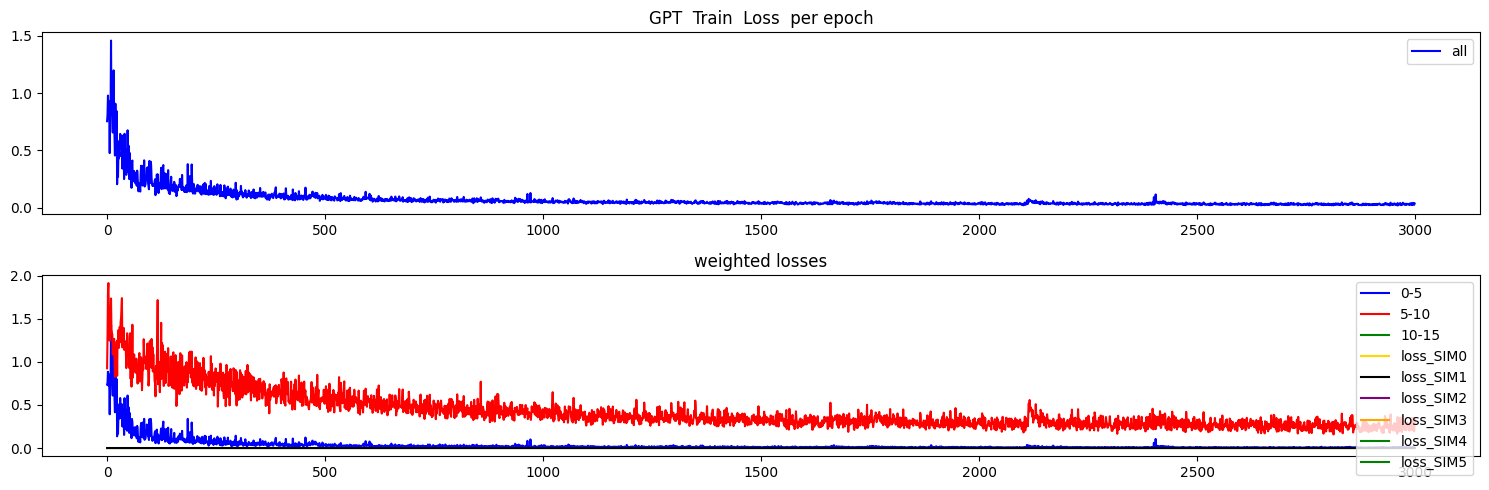

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


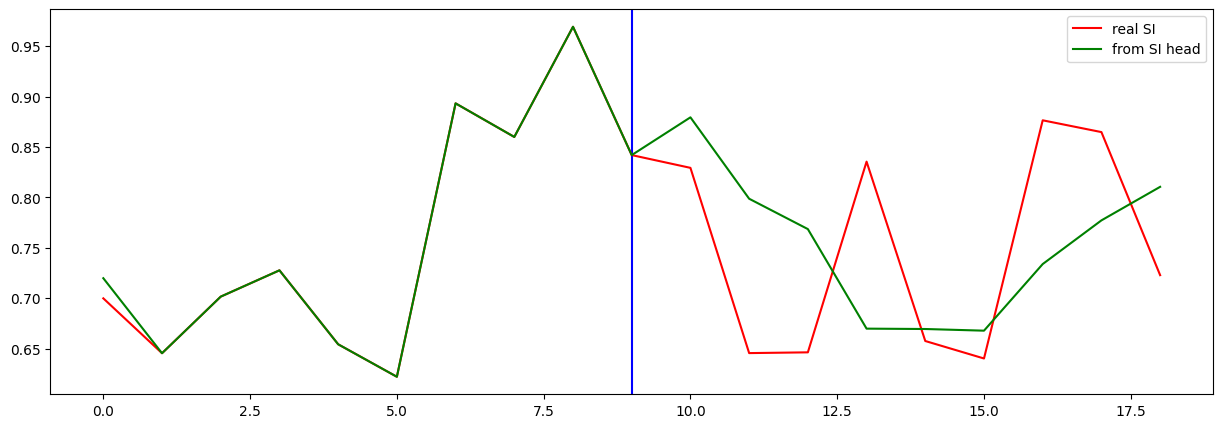

Testing R**2 - (all) - (no inputs):  0.9984743014123387
Testing R**2 - (f2) - SI full (no inputs):  -2.3413001221463077
Testing R**2 - SI head only (no inputs):  -1.0130684408358577
0 ...index R**2 (no inputs):  -0.32344990446368005
1 ...index R**2 (no inputs):  -2.3752249502693625
2 ...index R**2 (no inputs):  -2.3413001221463077
3 ...index R**2 (no inputs):  -21.142847711374557
4 ...index R**2 (no inputs):  -5.480337535701821
5 ...index R**2 (no inputs):  -9.537939834304826
6 ...index R**2 (no inputs):  -11.23711380547379
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.07560065404288174
10 ...index R**2 (no inputs):  -0.18595443107621645
11 ...index R**2 (no inputs):  -24.360511737048245
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4800551986562531
16 ...index R**2 (no inputs):  -0.12985228761344692
17 ...index R**2 (no inputs):  -2.064395

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.987947
Loss_SI: 0.9711933135986328 Loss_all: 1.1387288570404053
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.188546
Loss_SI: 0.12431786954402924 Loss_all: 0.7665949463844299
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.109783
Loss_SI: 0.042884454131126404 Loss_all: 0.7118670344352722
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.064048
Loss_SI: 0.01920701563358307 Loss_all: 0.4676206707954407
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.068594
Loss_SI: 0.024891946464776993 Loss_all: 0.46191492676734924
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.049293
Loss_SI: 0.01929030567407608 Loss_all: 0.3193211853504181
Prediction shape: torch.Size([32, 35])
===


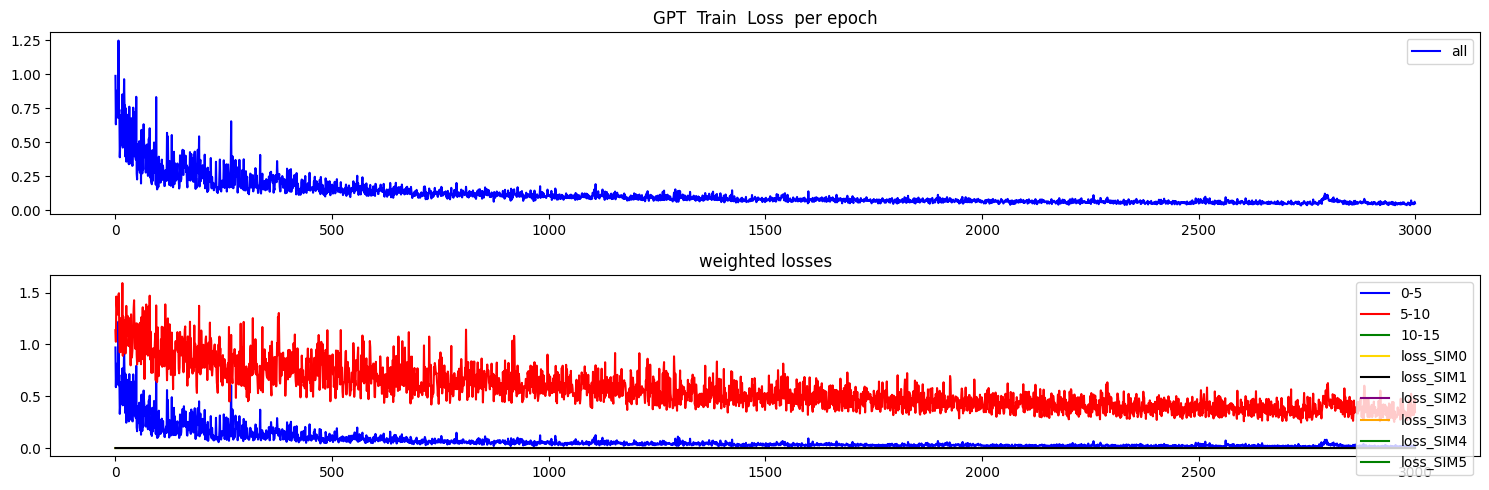

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


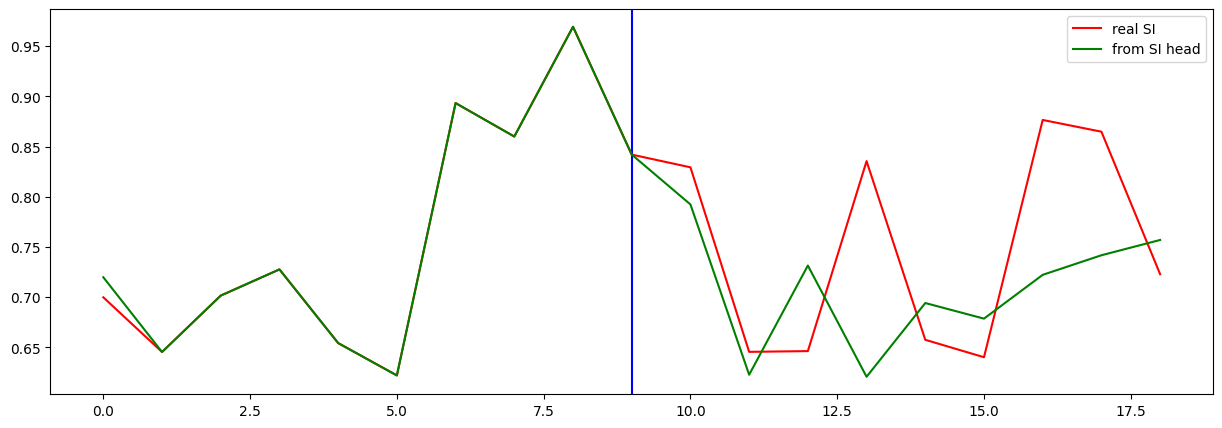

Testing R**2 - (all) - (no inputs):  0.9997281865946961
Testing R**2 - (f2) - SI full (no inputs):  -4.253982615074282
Testing R**2 - SI head only (no inputs):  -0.2672826191069999
0 ...index R**2 (no inputs):  -0.15757100669058688
1 ...index R**2 (no inputs):  -0.3002551815611789
2 ...index R**2 (no inputs):  -4.253982615074282
3 ...index R**2 (no inputs):  -7.4022648480250375
4 ...index R**2 (no inputs):  -2.8203718701759457
5 ...index R**2 (no inputs):  -0.45151338895143933
6 ...index R**2 (no inputs):  -5.591144799172885
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.16182884400507747
10 ...index R**2 (no inputs):  -0.08634418629238394
11 ...index R**2 (no inputs):  -47.56885350900229
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.047436399402350116
16 ...index R**2 (no inputs):  -0.18779799043631118
17 ...index R**2 (no inputs):  -24.9359

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.457547
Loss_SI: 0.3918267488479614 Loss_all: 1.0490282773971558
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.182896
Loss_SI: 0.13849598169326782 Loss_all: 0.5824915170669556
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.127657
Loss_SI: 0.08371246606111526 Loss_all: 0.5231567621231079
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.097568
Loss_SI: 0.048680856823921204 Loss_all: 0.5375522971153259
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.081751
Loss_SI: 0.028609640896320343 Loss_all: 0.5600256323814392
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.065881
Loss_SI: 0.027299247682094574 Loss_all: 0.4131184220314026
Prediction shape: torch.Size([32, 35])
===


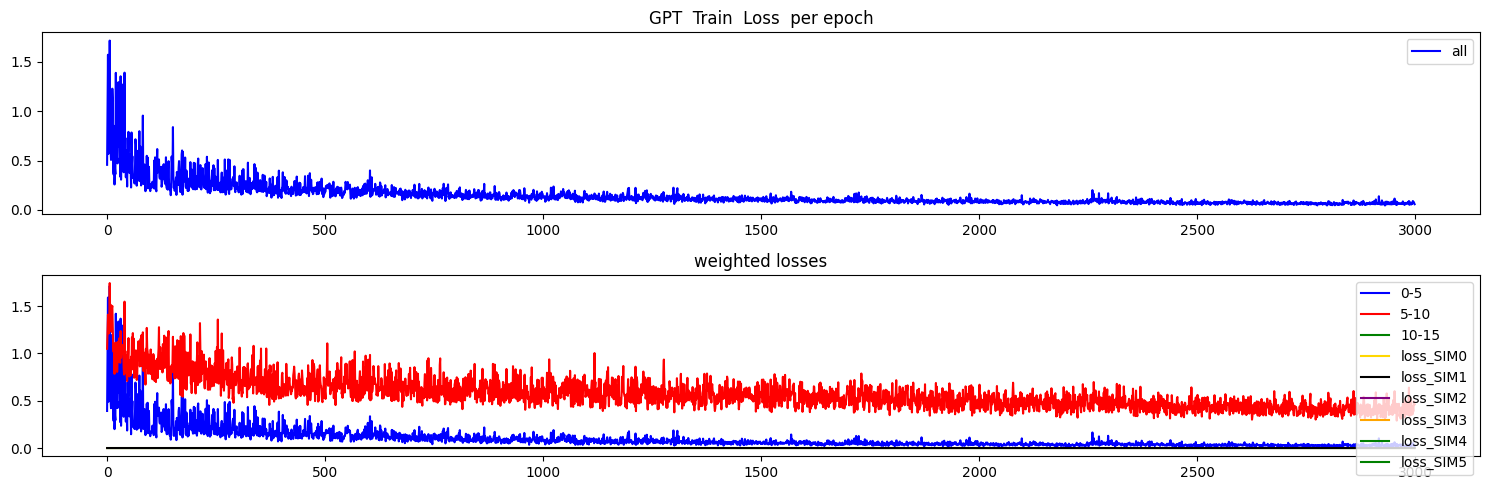

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


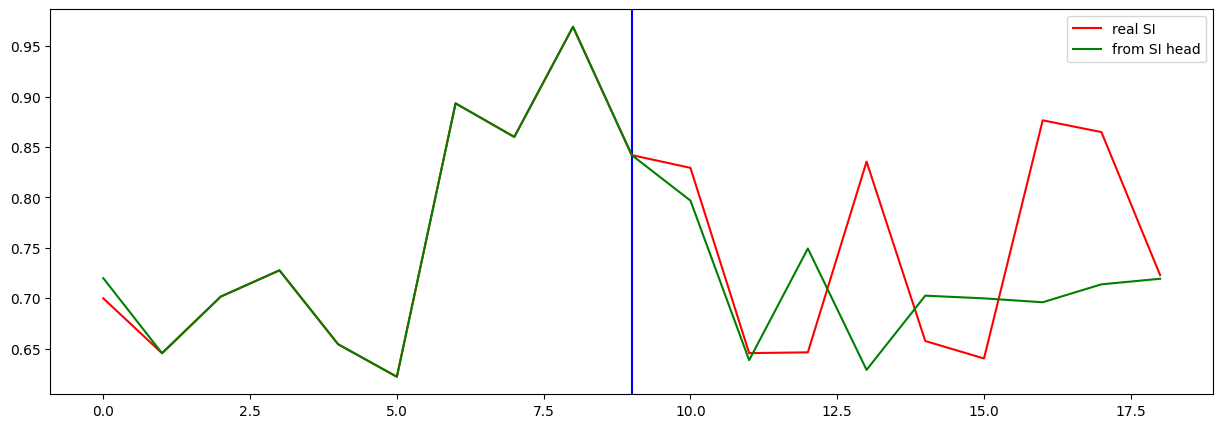

Testing R**2 - (all) - (no inputs):  0.9918985448943696
Testing R**2 - (f2) - SI full (no inputs):  -0.6670839693321691
Testing R**2 - SI head only (no inputs):  -0.20363136631112133
0 ...index R**2 (no inputs):  0.010604518521304396
1 ...index R**2 (no inputs):  -1.2279031247093393
2 ...index R**2 (no inputs):  -0.6670839693321691
3 ...index R**2 (no inputs):  -788.5966168540117
4 ...index R**2 (no inputs):  -900.4553651205061
5 ...index R**2 (no inputs):  -56.65901263281005
6 ...index R**2 (no inputs):  -38.406992634792374
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1448953501792789
10 ...index R**2 (no inputs):  -0.24634439200850888
11 ...index R**2 (no inputs):  -117.83995280948285
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.913373444141923
16 ...index R**2 (no inputs):  -0.8081209935305711
17 ...index R**2 (no inputs):  -498.445245

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.882035
Loss_SI: 0.853714644908905 Loss_all: 1.1369208097457886
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.207223
Loss_SI: 0.1416831910610199 Loss_all: 0.7970777750015259
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.119942
Loss_SI: 0.07062993943691254 Loss_all: 0.5637522339820862
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.127137
Loss_SI: 0.0739801675081253 Loss_all: 0.6055456399917603
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.144737
Loss_SI: 0.0897984728217125 Loss_all: 0.6391886472702026
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.102015
Loss_SI: 0.056266412138938904 Loss_all: 0.5137560367584229
Prediction shape: torch.Size([32, 35])
===


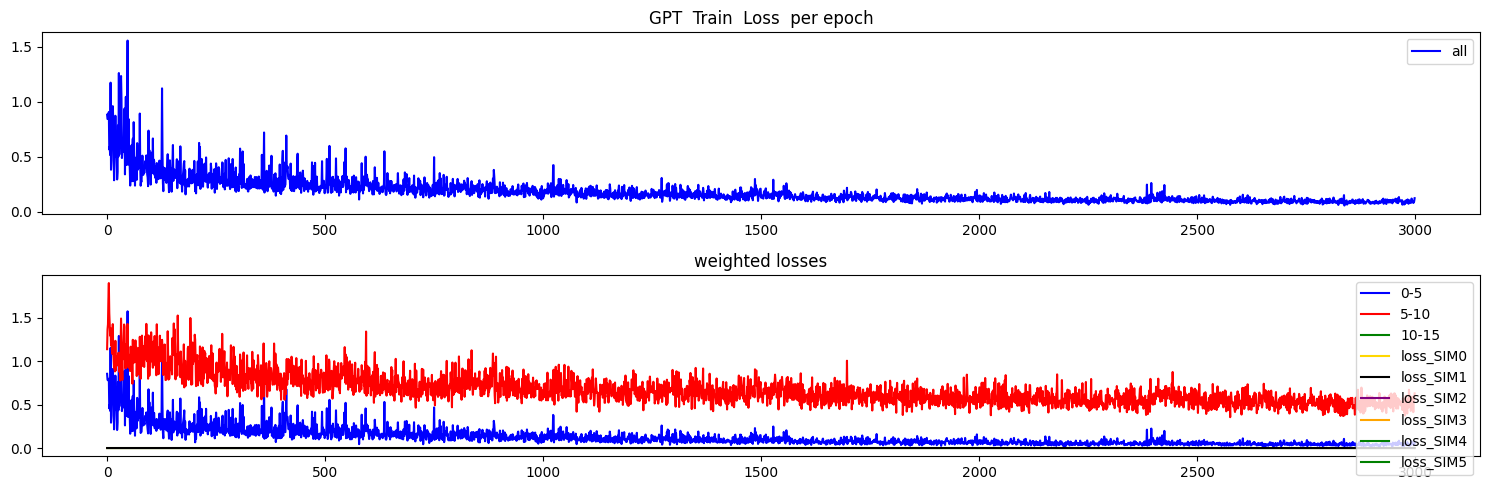

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


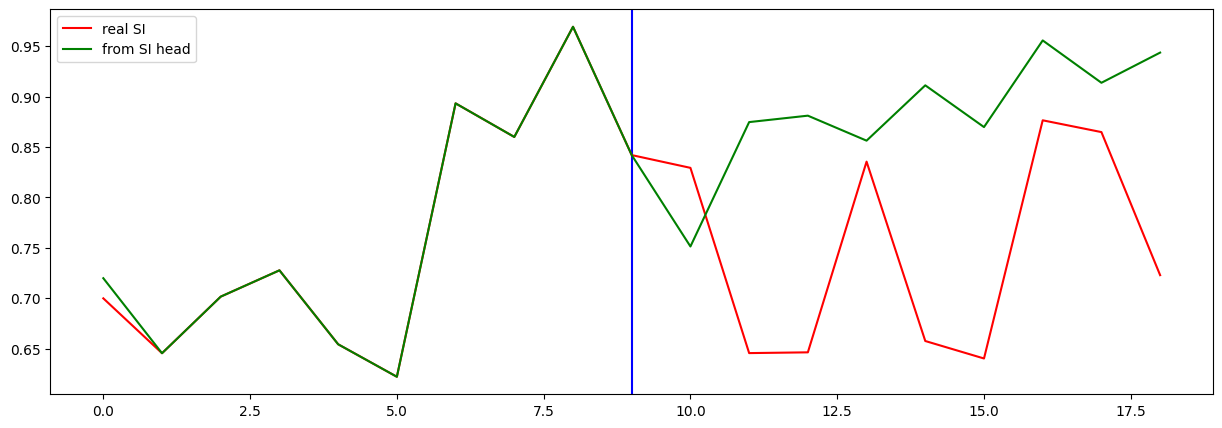

Testing R**2 - (all) - (no inputs):  0.9678869829943014
Testing R**2 - (f2) - SI full (no inputs):  -6.124736488963151
Testing R**2 - SI head only (no inputs):  -2.5710050982740107
0 ...index R**2 (no inputs):  -0.7251547925890496
1 ...index R**2 (no inputs):  -2.0906183220140964
2 ...index R**2 (no inputs):  -6.124736488963151
3 ...index R**2 (no inputs):  -130.57613265722392
4 ...index R**2 (no inputs):  -687.8465521202307
5 ...index R**2 (no inputs):  -231.18274360940688
6 ...index R**2 (no inputs):  -2952.760781098698
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.21086728148957867
10 ...index R**2 (no inputs):  -0.7247917146646439
11 ...index R**2 (no inputs):  -506.489109805607
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.35263566157122894
16 ...index R**2 (no inputs):  -0.5011585619360186
17 ...index R**2 (no inputs):  -982.529834417

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.794217
Loss_SI: 0.7454806566238403 Loss_all: 1.23284113407135
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.090370
Loss_SI: 0.035579316318035126 Loss_all: 0.5834834575653076
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.070839
Loss_SI: 0.026372505351901054 Loss_all: 0.47104108333587646
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.052408
Loss_SI: 0.016611184924840927 Loss_all: 0.3745805025100708
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.044957
Loss_SI: 0.012132784351706505 Loss_all: 0.34037142992019653
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.037715
Loss_SI: 0.007956135086715221 Loss_all: 0.30554479360580444
Prediction shape: torch.Size([32, 35])
===


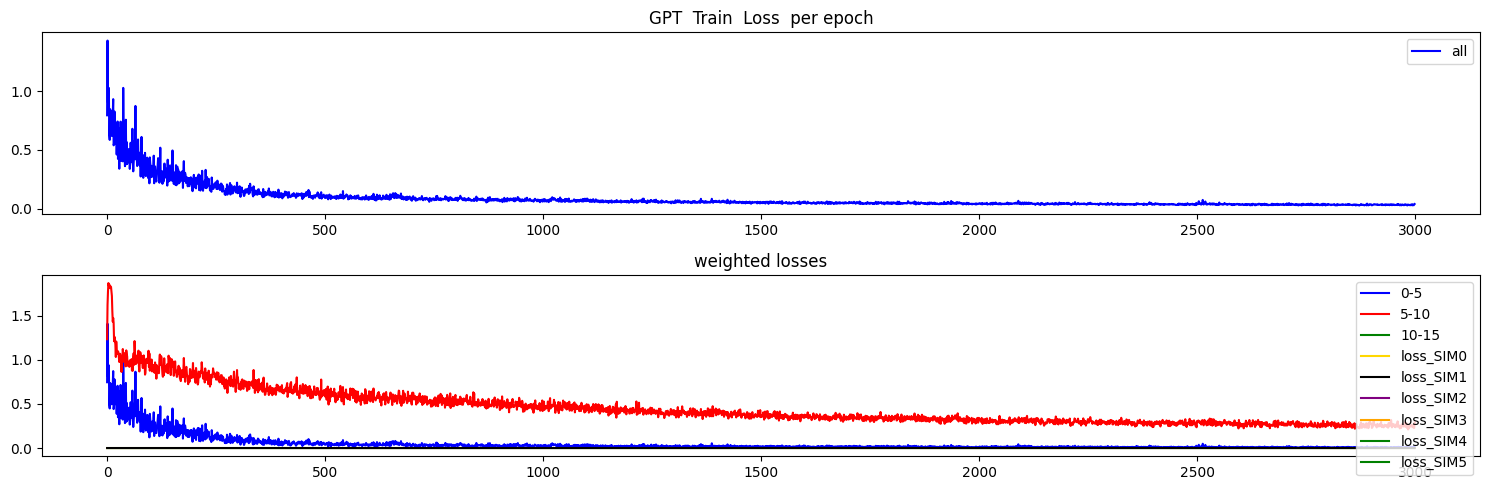

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


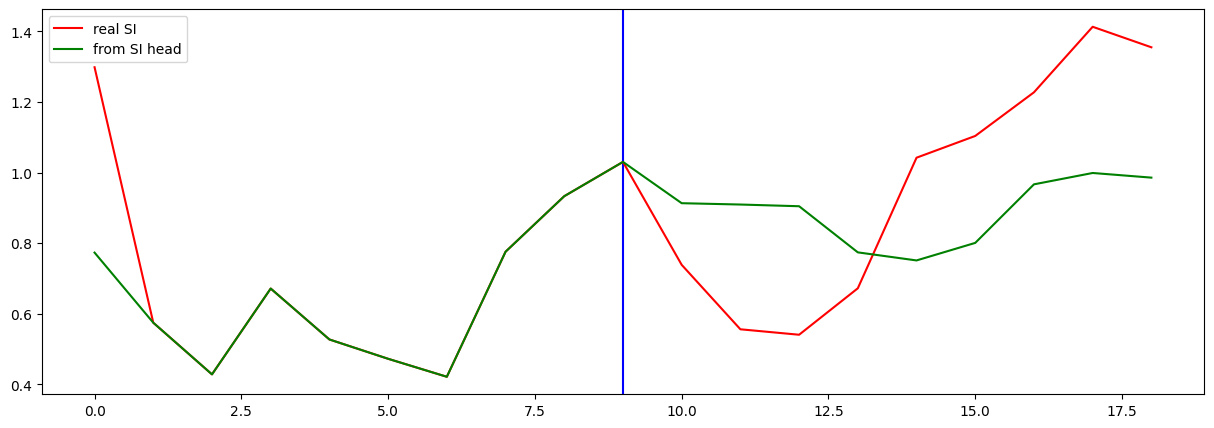

Testing R**2 - (all) - (no inputs):  0.8679440029944224
Testing R**2 - (f2) - SI full (no inputs):  -0.6335454652107375
Testing R**2 - SI head only (no inputs):  -0.16564555299537553
0 ...index R**2 (no inputs):  -1.0035859350619964
1 ...index R**2 (no inputs):  -3.284059529845546
2 ...index R**2 (no inputs):  -0.6335454652107375
3 ...index R**2 (no inputs):  -1.2575777771408956
4 ...index R**2 (no inputs):  -4.180901744774248
5 ...index R**2 (no inputs):  -2.2124324527574686
6 ...index R**2 (no inputs):  -3.3157626058665697
7 ...index R**2 (no inputs):  -3.5899857597286466
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7541851043999059
10 ...index R**2 (no inputs):  -1.6289359438400792
11 ...index R**2 (no inputs):  -456.9569106969808
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4024607698737506
16 ...index R**2 (no inputs):  -4.197185224310794
17 ...index R**2 (no inputs)

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.884730
Loss_SI: 0.8149808645248413 Loss_all: 1.5124703645706177
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.129743
Loss_SI: 0.07623545825481415 Loss_all: 0.6113119125366211
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.083147
Loss_SI: 0.04152267426252365 Loss_all: 0.45777028799057007
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.068560
Loss_SI: 0.026995046064257622 Loss_all: 0.442644864320755
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.053289
Loss_SI: 0.02385331131517887 Loss_all: 0.31820520758628845
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.053290
Loss_SI: 0.016578979790210724 Loss_all: 0.3836930990219116
Prediction shape: torch.Size([32, 35])
===


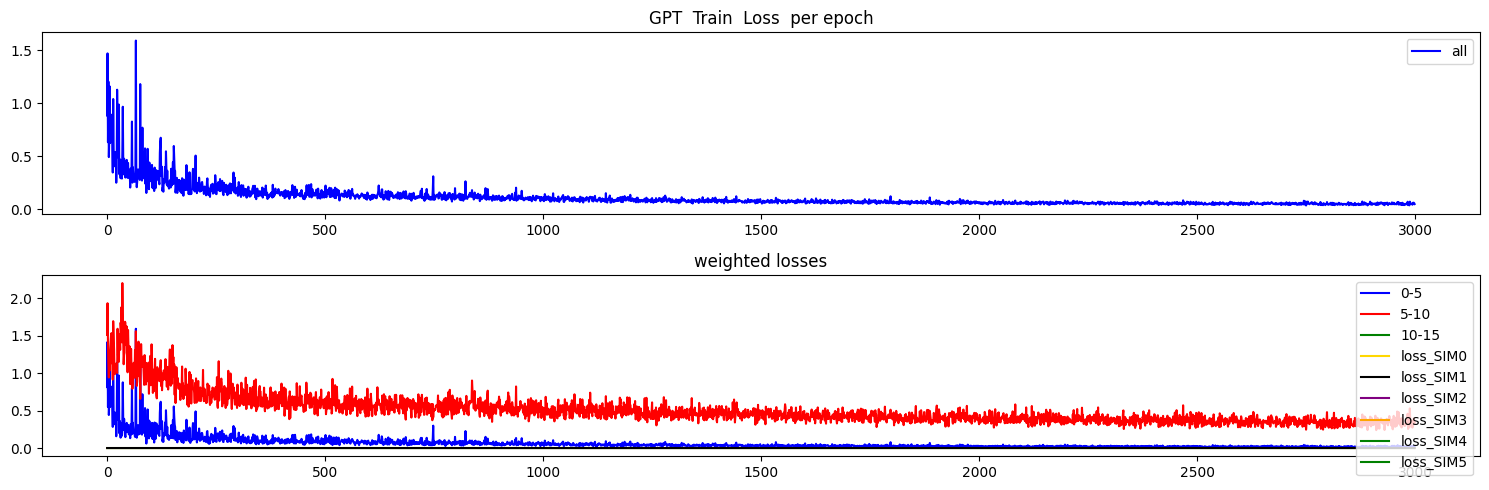

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


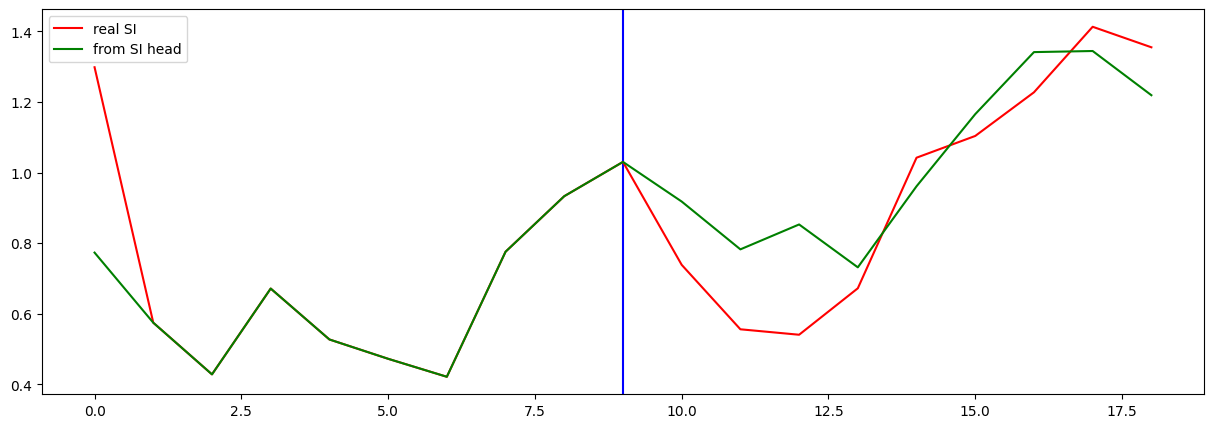

Testing R**2 - (all) - (no inputs):  0.9297001505854074
Testing R**2 - (f2) - SI full (no inputs):  -0.6113553576609434
Testing R**2 - SI head only (no inputs):  0.6311582311920936
0 ...index R**2 (no inputs):  -2.6978192311143525
1 ...index R**2 (no inputs):  -3.3187473265655507
2 ...index R**2 (no inputs):  -0.6113553576609434
3 ...index R**2 (no inputs):  -0.41351650918066696
4 ...index R**2 (no inputs):  -395.72826517249564
5 ...index R**2 (no inputs):  -0.6998961475980261
6 ...index R**2 (no inputs):  -5.425981293171764
7 ...index R**2 (no inputs):  -135.14695767209938
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.23172053830558248
10 ...index R**2 (no inputs):  -0.1029970139243297
11 ...index R**2 (no inputs):  -366.8506547335185
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.289201729549792
16 ...index R**2 (no inputs):  -10.274312027591975
17 ...index R**2 (no inputs

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.558195
Loss_SI: 0.49897652864456177 Loss_all: 1.0911579132080078
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.139379
Loss_SI: 0.0950445607304573 Loss_all: 0.5383867621421814
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.146744
Loss_SI: 0.10302787274122238 Loss_all: 0.5401917695999146
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.105534
Loss_SI: 0.045336827635765076 Loss_all: 0.6473038196563721
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.074638
Loss_SI: 0.04485514387488365 Loss_all: 0.3426854610443115
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.048975
Loss_SI: 0.010747380554676056 Loss_all: 0.39302101731300354
Prediction shape: torch.Size([32, 35])
===


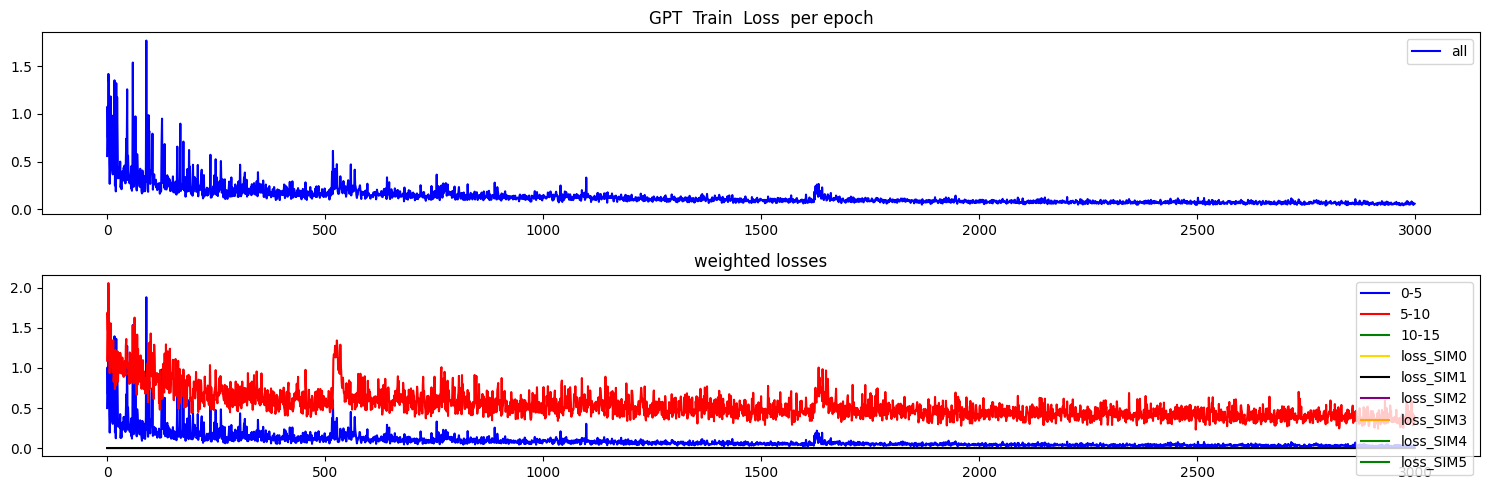

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


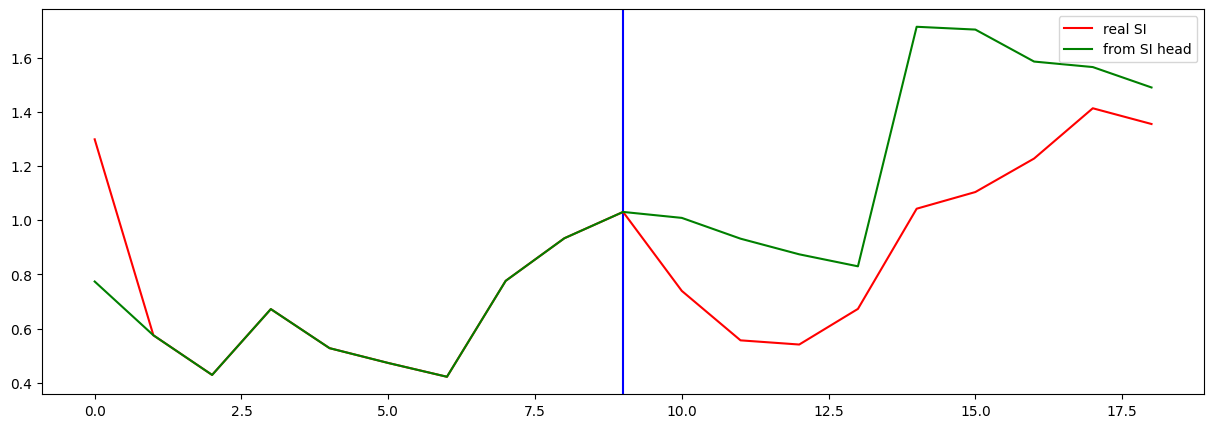

Testing R**2 - (all) - (no inputs):  0.9647493851280665
Testing R**2 - (f2) - SI full (no inputs):  0.13556466089016184
Testing R**2 - SI head only (no inputs):  -0.20019853494175321
0 ...index R**2 (no inputs):  -0.6923685455155812
1 ...index R**2 (no inputs):  -2.8982403414630555
2 ...index R**2 (no inputs):  0.13556466089016184
3 ...index R**2 (no inputs):  -0.3251469799783189
4 ...index R**2 (no inputs):  -1758.9619606350143
5 ...index R**2 (no inputs):  0.20657373618475394
6 ...index R**2 (no inputs):  -13.49741061015747
7 ...index R**2 (no inputs):  -228.53963567916026
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.06818473679904724
10 ...index R**2 (no inputs):  -0.5506842891547592
11 ...index R**2 (no inputs):  -692.3702691290855
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4101514154489865
16 ...index R**2 (no inputs):  -2.6414923987977033
17 ...index R**2 (no input

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.939531
Loss_SI: 0.8802435994148254 Loss_all: 1.4731215238571167
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.230501
Loss_SI: 0.16575461626052856 Loss_all: 0.8132221102714539
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.123299
Loss_SI: 0.09029122442007065 Loss_all: 0.4203730523586273
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.085737
Loss_SI: 0.05160392075777054 Loss_all: 0.3929394483566284
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.094566
Loss_SI: 0.05341693013906479 Loss_all: 0.4649052917957306
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.076620
Loss_SI: 0.04720785841345787 Loss_all: 0.34133225679397583
Prediction shape: torch.Size([32, 35])
===


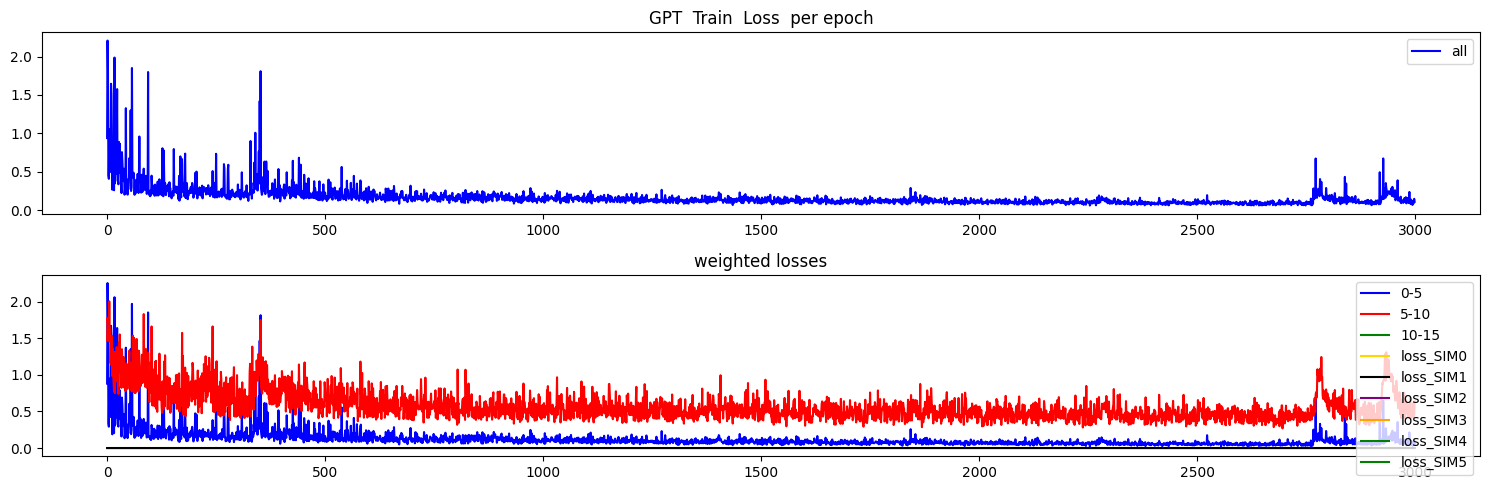

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


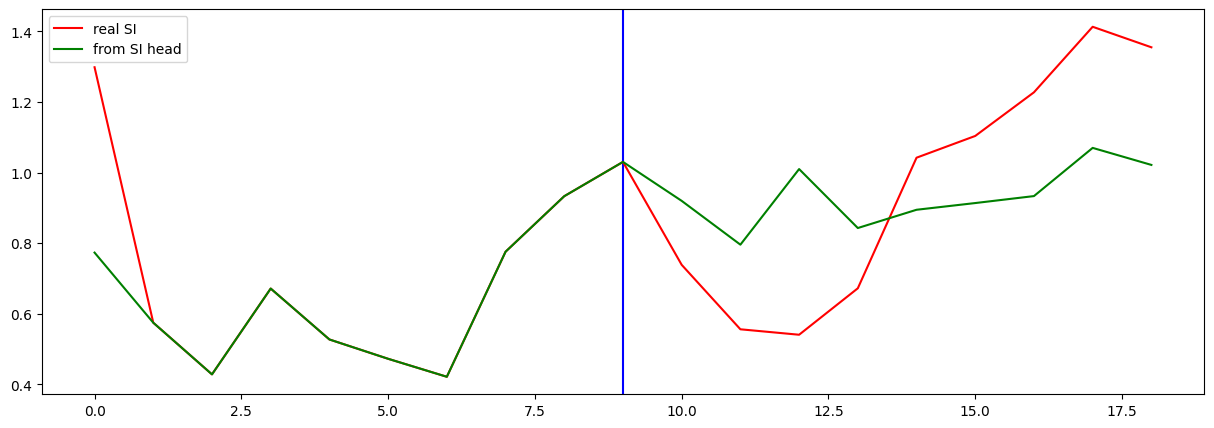

Testing R**2 - (all) - (no inputs):  0.9431643254602639
Testing R**2 - (f2) - SI full (no inputs):  -0.0486009008904873
Testing R**2 - SI head only (no inputs):  0.08267349579447125
0 ...index R**2 (no inputs):  -0.45862030625945693
1 ...index R**2 (no inputs):  -2.418124622480153
2 ...index R**2 (no inputs):  -0.0486009008904873
3 ...index R**2 (no inputs):  -1.848394981662211
4 ...index R**2 (no inputs):  -837.9280729738496
5 ...index R**2 (no inputs):  -0.35860891734202927
6 ...index R**2 (no inputs):  -1.5284543416063308
7 ...index R**2 (no inputs):  -54.93252918386821
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.30631421241686363
10 ...index R**2 (no inputs):  -0.10614409168530692
11 ...index R**2 (no inputs):  -1034.3157035922616
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6113486075265022
16 ...index R**2 (no inputs):  0.024740868699593133
17 ...index R**2 (no inp

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.793880
Loss_SI: 0.7121584415435791 Loss_all: 1.5293707847595215
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.100840
Loss_SI: 0.03557382896542549 Loss_all: 0.6882352828979492
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.069844
Loss_SI: 0.022066090255975723 Loss_all: 0.49984487891197205
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.051568
Loss_SI: 0.009873299859464169 Loss_all: 0.426822692155838
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.047364
Loss_SI: 0.01061306893825531 Loss_all: 0.3781270980834961
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.041214
Loss_SI: 0.00947872456163168 Loss_all: 0.3268306255340576
Prediction shape: torch.Size([32, 35])
===


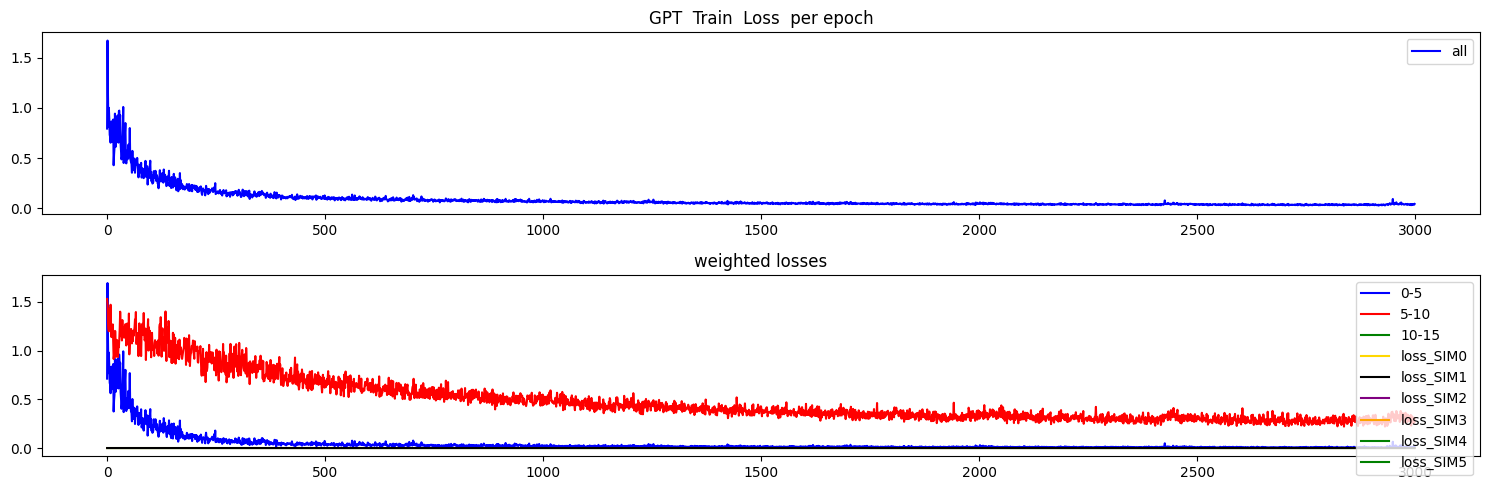

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


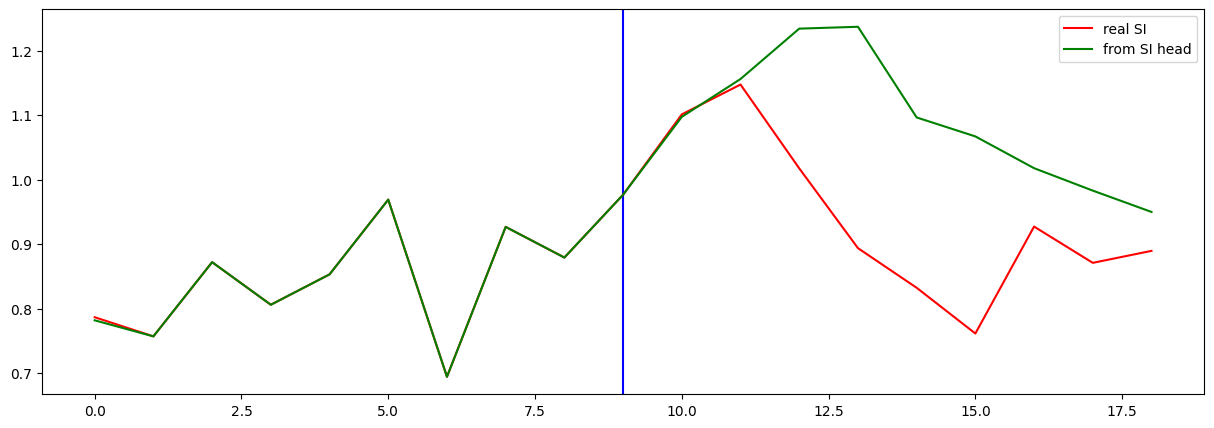

Testing R**2 - (all) - (no inputs):  0.9829914963186703
Testing R**2 - (f2) - SI full (no inputs):  -4.300576372673208
Testing R**2 - SI head only (no inputs):  -3.324569749154759
0 ...index R**2 (no inputs):  -0.8508751439005309
1 ...index R**2 (no inputs):  -0.23018535035191556
2 ...index R**2 (no inputs):  -4.300576372673208
3 ...index R**2 (no inputs):  -3.038673661353882
4 ...index R**2 (no inputs):  -22.639946484200948
5 ...index R**2 (no inputs):  -5.845261143156552
6 ...index R**2 (no inputs):  -145.7153037287402
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.049822193995891606
10 ...index R**2 (no inputs):  -0.3082030541130474
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.659875432630342
16 ...index R**2 (no inputs):  -2.4868397323845794
17 ...index R**2 (no inputs):  -20.662274199724198
18 ...inde

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.924416
Loss_SI: 0.8706097602844238 Loss_all: 1.4086737632751465
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.172640
Loss_SI: 0.08359990268945694 Loss_all: 0.9740056395530701
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.087721
Loss_SI: 0.02393897995352745 Loss_all: 0.6617628335952759
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.085853
Loss_SI: 0.02538812905550003 Loss_all: 0.6300374865531921
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.078992
Loss_SI: 0.018443850800395012 Loss_all: 0.6239280700683594
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.066540
Loss_SI: 0.01880490593612194 Loss_all: 0.4961572289466858
Prediction shape: torch.Size([32, 35])
===


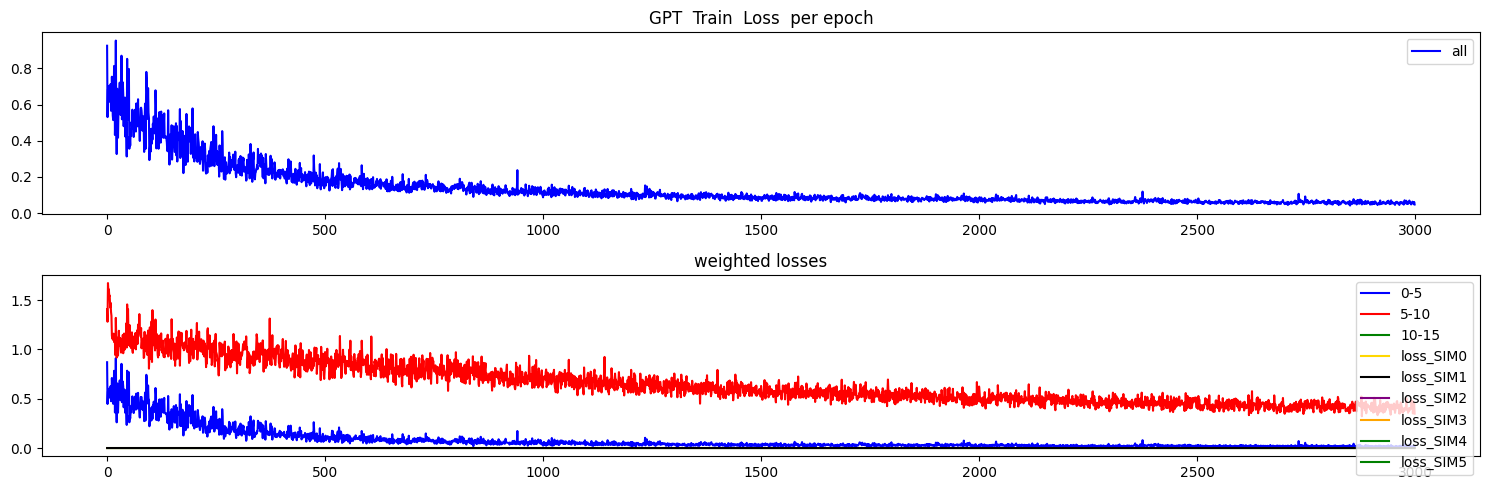

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


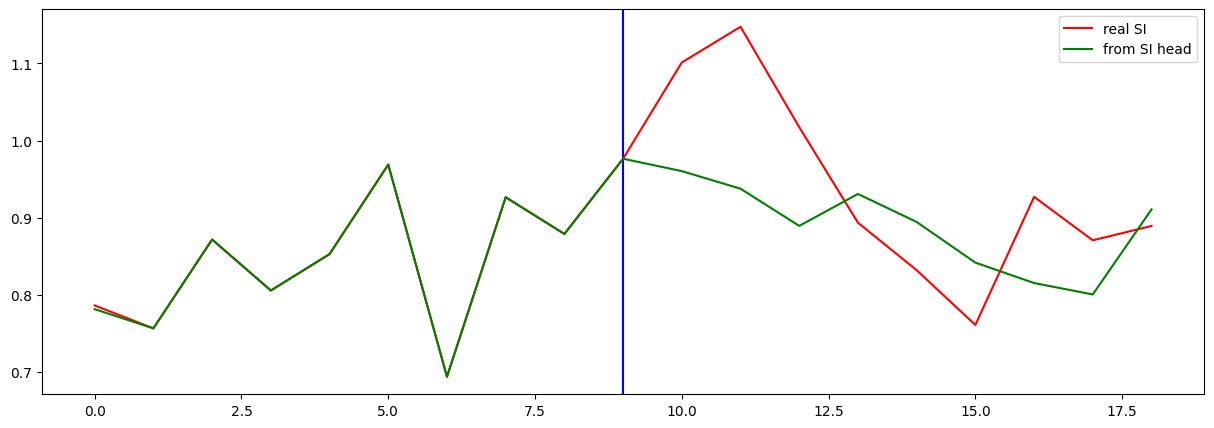

Testing R**2 - (all) - (no inputs):  0.9981503903374388
Testing R**2 - (f2) - SI full (no inputs):  0.3019880193378519
Testing R**2 - SI head only (no inputs):  0.09627524912176988
0 ...index R**2 (no inputs):  -0.9243474635264788
1 ...index R**2 (no inputs):  -1.832825156761364
2 ...index R**2 (no inputs):  0.3019880193378519
3 ...index R**2 (no inputs):  -6.013682516765795
4 ...index R**2 (no inputs):  -6.4990417677334085
5 ...index R**2 (no inputs):  0.2789125163540128
6 ...index R**2 (no inputs):  -547.991354982712
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3129914887353695
10 ...index R**2 (no inputs):  -0.5956913804169743
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.22413136897492592
16 ...index R**2 (no inputs):  -0.6958642048879675
17 ...index R**2 (no inputs):  -483.10419311523435
18 ...index R

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.422499
Loss_SI: 0.3642937242984772 Loss_all: 0.9463419914245605
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.222859
Loss_SI: 0.15136517584323883 Loss_all: 0.8663004040718079
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.147442
Loss_SI: 0.0857926607131958 Loss_all: 0.7022894024848938
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.107068
Loss_SI: 0.046061236411333084 Loss_all: 0.6561275124549866
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.110927
Loss_SI: 0.06298935413360596 Loss_all: 0.5423706769943237
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.082658
Loss_SI: 0.04186229035258293 Loss_all: 0.4498158097267151
Prediction shape: torch.Size([32, 35])
===


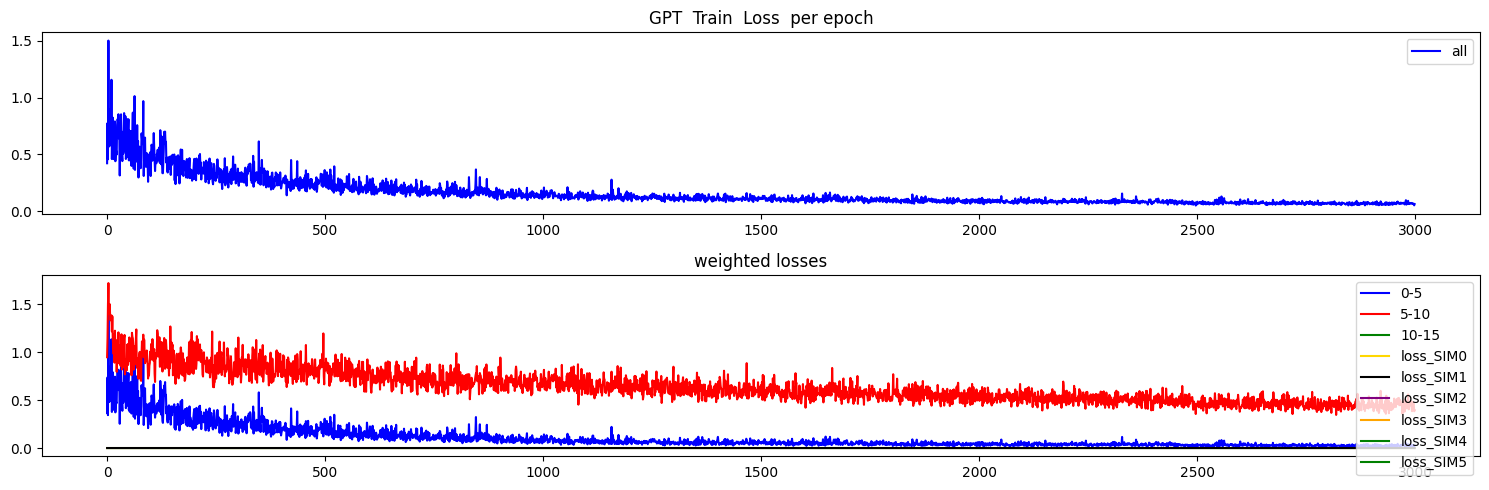

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


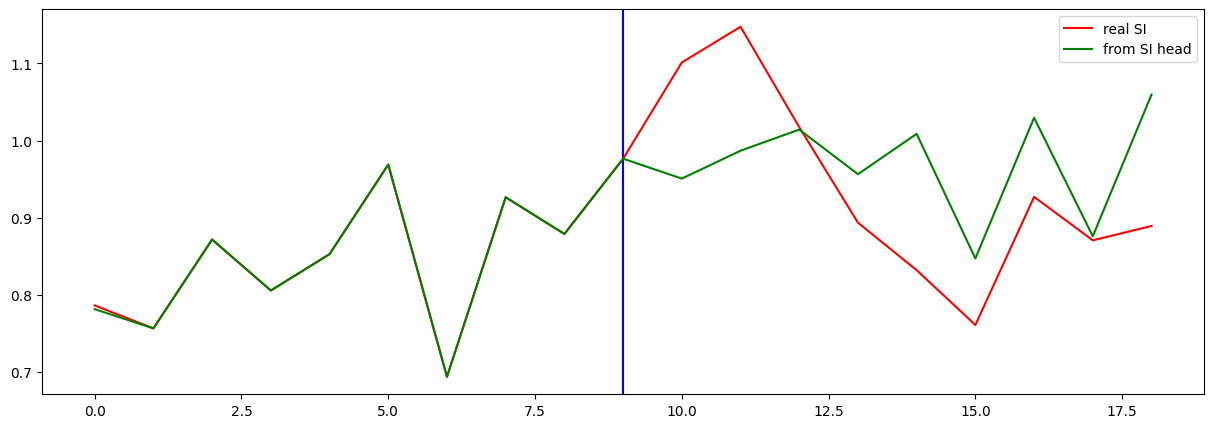

Testing R**2 - (all) - (no inputs):  0.9826827927116709
Testing R**2 - (f2) - SI full (no inputs):  -0.35871295617738475
Testing R**2 - SI head only (no inputs):  -1.0915840351255839
0 ...index R**2 (no inputs):  -0.7992577487834878
1 ...index R**2 (no inputs):  -0.37415247473701707
2 ...index R**2 (no inputs):  -0.35871295617738475
3 ...index R**2 (no inputs):  -3.3660368265838247
4 ...index R**2 (no inputs):  -28.217676014611676
5 ...index R**2 (no inputs):  -5.9726579070268135
6 ...index R**2 (no inputs):  -1469.1952124323698
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.20557950304824035
10 ...index R**2 (no inputs):  0.31716175606208186
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.24777307707363883
16 ...index R**2 (no inputs):  -0.7010338487932648
17 ...index R**2 (no inputs):  -58.18458913167318
18

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.848206
Loss_SI: 0.8044213652610779 Loss_all: 1.2422701120376587
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.398926
Loss_SI: 0.3410632908344269 Loss_all: 0.9196902513504028
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.184756
Loss_SI: 0.12437963485717773 Loss_all: 0.7281469106674194
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.189352
Loss_SI: 0.10247783362865448 Loss_all: 0.9712159633636475
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.165469
Loss_SI: 0.1148628517985344 Loss_all: 0.6209209561347961
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.122211
Loss_SI: 0.06807324290275574 Loss_all: 0.6094507575035095
Prediction shape: torch.Size([32, 35])
===


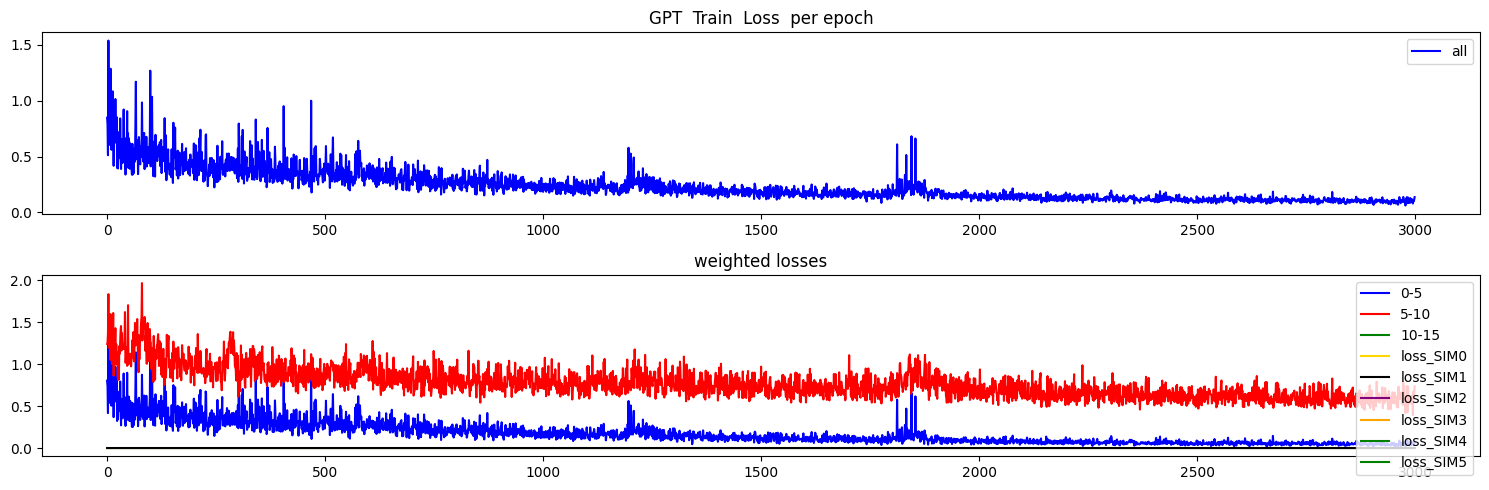

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


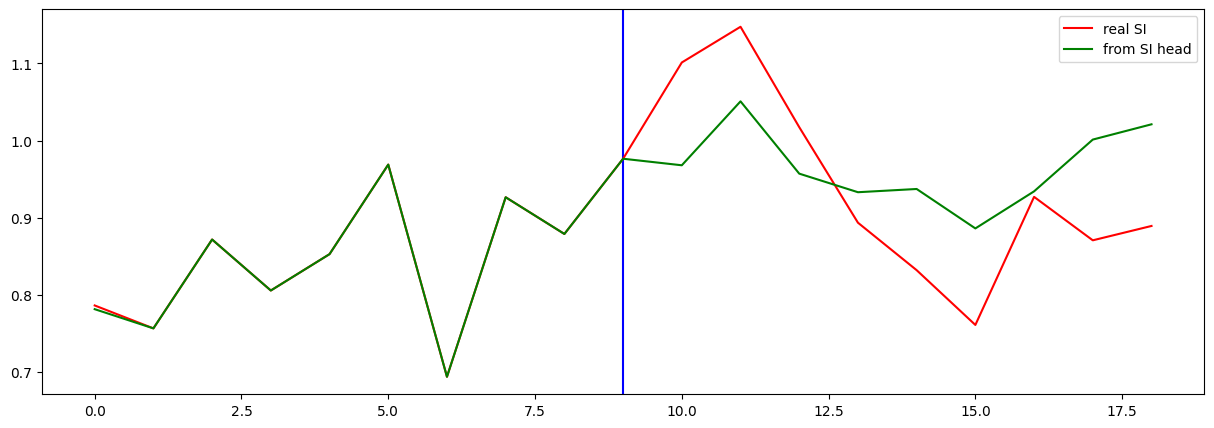

Testing R**2 - (all) - (no inputs):  0.9940142264500279
Testing R**2 - (f2) - SI full (no inputs):  -0.357396036483967
Testing R**2 - SI head only (no inputs):  -0.3384276622315814
0 ...index R**2 (no inputs):  -0.9841921379260579
1 ...index R**2 (no inputs):  -0.17906815329562553
2 ...index R**2 (no inputs):  -0.357396036483967
3 ...index R**2 (no inputs):  0.008165010897740577
4 ...index R**2 (no inputs):  -2.1267506936313114
5 ...index R**2 (no inputs):  -1.3995662440670964
6 ...index R**2 (no inputs):  -1448.0694675050427
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.12973961132316258
10 ...index R**2 (no inputs):  -0.040545027563348324
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.952868315144271
16 ...index R**2 (no inputs):  -2.257459330044731
17 ...index R**2 (no inputs):  -118.57101357777914
18 ..

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.06766785130657826


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: 0.516167875861476


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: 0.06091531890168145


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.0580727639091676



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: 0.15895691799520284
2 .....R² on first n steps: -0.016688172653797295
3 .....R² on first n steps: -0.3406984708786793
4 .....R² on first n steps: -0.474577352255638
5 .....R² on first n steps: -0.5273168719515953
6 .....R² on first n steps: -0.4532635385515975
7 .....R² on first n steps: -0.26296020865283687
8 .....R² on first n steps: -0.1331823795217213
9 .....R² on first n steps: -0.06766785130657826


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: 0.06337044316429741
2 .....R² on first n steps: 0.2496573915607706
3 .....R² on first n steps: 0.06390793789245408
4 .....R² on first n steps: 0.013125076678547787
5 .....R² on first n steps: 0.10219210163585957
6 .....R² on first n steps: 0.21965051380881317
7 .....R² on first n steps: 0.39643540497427165
8 .....R² on first n steps: 0.49444903806328366
9 .....R² on first n steps: 0.516167875861476


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: -0.30202807000323517
2 .....R² on first n steps: -0.19567783974695852
3 .....R² on first n steps: -0.2882759841759024
4 .....R² on first n steps: -0.14539880515575287
5 .....R² on first n steps: -0.5139746364293465
6 .....R² on first n steps: -0.46143727748064545
7 .....R² on first n steps: -0.17483074675019594
8 .....R² on first n steps: -0.003168717365728435
9 .....R² on first n steps: 0.06091531890168145


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: 0.17148537107931472
2 .....R² on first n steps: 0.06841144796765886
3 .....R² on first n steps: -0.424360571178128
4 .....R² on first n steps: -0.3858822508724471
5 .....R² on first n steps: -0.45506205978015557
6 .....R² on first n steps: -0.26737092299910503
7 .....R² on first n steps: -0.1279830464121623
8 .....R² on first n steps: -0.04857979357712838
9 .....R² on first n steps: -0.0580727639091676



## Plot


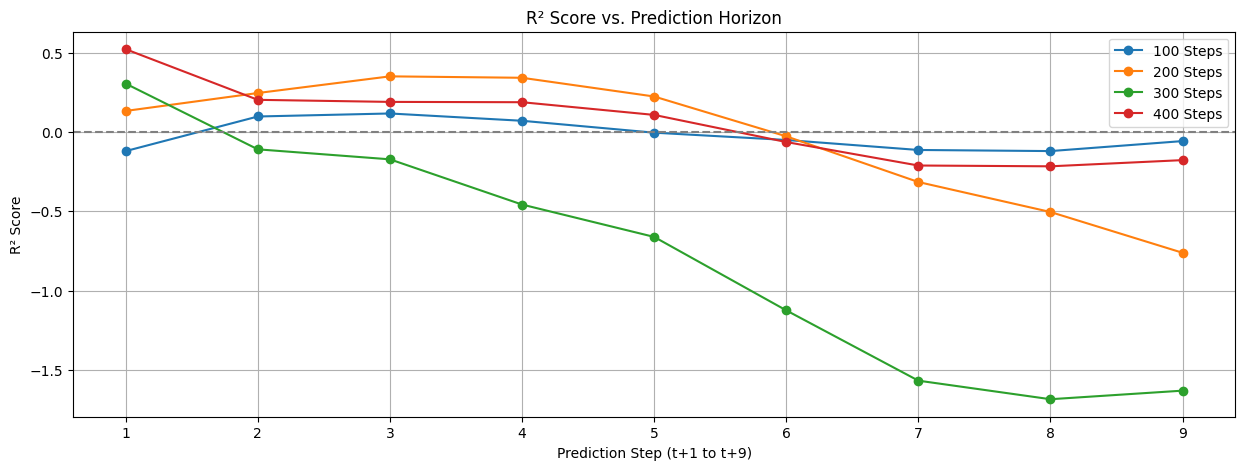

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
